In [1305]:
# Run once
%load_ext autoreload
%autoreload 2
%cd ..

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/lena/modconn


# Preamble

In [1306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps
from sklearn.datasets import make_moons, make_circles
import datasets
import torch
from datasets.tabular import TabularModel, TabularModelPerturb, learning_pipeline
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from similarity import get_top_k, top_k_sa, average_pairwise_score, ground_truth_score, average_ground_truth_score
from similarity import angle_diff, average_pairwise_score_grad, cosine_similarity
from util import State, get_weight_norm, get_weight_diff, linear_weight_interpolation
from train import get_states
from tqdm import tqdm

In [1307]:
class TwoMoons(Dataset):
    def __init__(self, n_samples=1000, noise=0.1, random_state=0, circles=False):
        if circles:
            X, y = make_circles(n_samples=n_samples, noise=noise,
                                factor=0.5, random_state=random_state)
        else:
            X, y = make_moons(n_samples=n_samples, noise=noise,
                              random_state=random_state)
        self.name = 'moons'
        self.data = torch.FloatTensor(X)
        self.labels = torch.LongTensor(y)

    def __len__(self):
        """Return the length of the dataset. Necessary for PyTorch's DataLoader."""
        return len(self.data)

    def __getitem__(self, idx):
        """Return the sample at index idx. Necessary for PyTorch's DataLoader."""
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

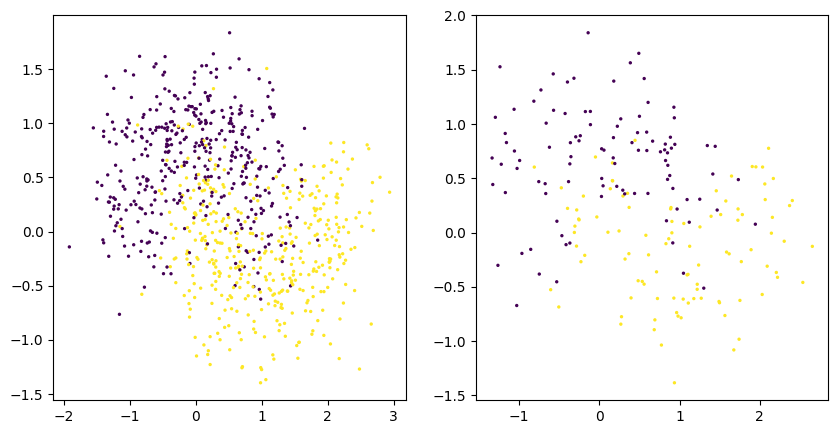

In [1308]:
circles = False
trainset = TwoMoons(n_samples=800, noise=0.4, random_state=0, circles=circles)
testset = TwoMoons(n_samples=200, noise=0.4, random_state=1, circles=circles)
# trainset.data[trainset.labels==1, 0] -= 0.5
# testset.data[testset.labels==1, 0] -= 0.5
X_test, y_test = testset.data.numpy(), testset.labels.numpy()
n_inputs, n_features = X_test.shape
X_train, y_train = trainset.data.numpy(), trainset.labels.numpy()

# Plot trainset and test set on two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels, s=2)
ax2.scatter(testset.data[:, 0], testset.data[:, 1], c=testset.labels, s=2)
plt.show()

# Train Models

In [1309]:
n_models = 200
config = {'n': n_models,
          'optimizer': 'adam',
          'epochs': 100,
          'lr': 0.004,
          'batch_size': 16,
          'loo': False,
          'seed': 0,
          'mode_connect': '',
          'wandb': False}

In [1323]:
models = []
config['epochs'] = 100
config['mode_connect'] = ''
States = get_states(n_models, TabularModel, trainset, testset, config)
for S in States:
    models.append(learning_pipeline(S))

Training with seed 0
Run 0


100%|██████████| 5000/5000 [00:02<00:00, 1725.38it/s]


Train/Test Accuracy: 0.882 0.83
Train/Test Loss: 0.43 0.464
Training with seed 1
Run 1


100%|██████████| 5000/5000 [00:02<00:00, 1781.02it/s]


Train/Test Accuracy: 0.877 0.86
Train/Test Loss: 0.431 0.455
Training with seed 2
Run 2


100%|██████████| 5000/5000 [00:02<00:00, 1741.09it/s]


Train/Test Accuracy: 0.886 0.835
Train/Test Loss: 0.426 0.463
Training with seed 3
Run 3


100%|██████████| 5000/5000 [00:02<00:00, 1754.50it/s]


Train/Test Accuracy: 0.882 0.825
Train/Test Loss: 0.425 0.462
Training with seed 4
Run 4


100%|██████████| 5000/5000 [00:02<00:00, 1770.91it/s]


Train/Test Accuracy: 0.882 0.855
Train/Test Loss: 0.428 0.45
Training with seed 5
Run 5


100%|██████████| 5000/5000 [00:02<00:00, 1796.09it/s]


Train/Test Accuracy: 0.882 0.85
Train/Test Loss: 0.429 0.457
Training with seed 6
Run 6


100%|██████████| 5000/5000 [00:02<00:00, 1798.81it/s]


Train/Test Accuracy: 0.879 0.84
Train/Test Loss: 0.428 0.452
Training with seed 7
Run 7


100%|██████████| 5000/5000 [00:02<00:00, 1793.54it/s]


Train/Test Accuracy: 0.882 0.835
Train/Test Loss: 0.432 0.452
Training with seed 8
Run 8


100%|██████████| 5000/5000 [00:02<00:00, 1796.71it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.428 0.452
Training with seed 9
Run 9


100%|██████████| 5000/5000 [00:02<00:00, 1795.16it/s]


Train/Test Accuracy: 0.874 0.845
Train/Test Loss: 0.433 0.453
Training with seed 10
Run 10


100%|██████████| 5000/5000 [00:02<00:00, 1797.58it/s]


Train/Test Accuracy: 0.882 0.85
Train/Test Loss: 0.429 0.452
Training with seed 11
Run 11


100%|██████████| 5000/5000 [00:02<00:00, 1773.64it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.427 0.455
Training with seed 12
Run 12


100%|██████████| 5000/5000 [00:02<00:00, 1793.80it/s]


Train/Test Accuracy: 0.87 0.825
Train/Test Loss: 0.44 0.467
Training with seed 13
Run 13


100%|██████████| 5000/5000 [00:02<00:00, 1785.00it/s]


Train/Test Accuracy: 0.877 0.845
Train/Test Loss: 0.432 0.457
Training with seed 14
Run 14


100%|██████████| 5000/5000 [00:02<00:00, 1780.27it/s]


Train/Test Accuracy: 0.886 0.855
Train/Test Loss: 0.427 0.451
Training with seed 15
Run 15


100%|██████████| 5000/5000 [00:02<00:00, 1709.56it/s]


Train/Test Accuracy: 0.884 0.855
Train/Test Loss: 0.429 0.452
Training with seed 16
Run 16


100%|██████████| 5000/5000 [00:02<00:00, 1716.93it/s]


Train/Test Accuracy: 0.887 0.835
Train/Test Loss: 0.427 0.461
Training with seed 17
Run 17


100%|██████████| 5000/5000 [00:02<00:00, 1797.72it/s]


Train/Test Accuracy: 0.879 0.84
Train/Test Loss: 0.43 0.459
Training with seed 18
Run 18


100%|██████████| 5000/5000 [00:02<00:00, 1782.86it/s]


Train/Test Accuracy: 0.882 0.855
Train/Test Loss: 0.427 0.449
Training with seed 19
Run 19


100%|██████████| 5000/5000 [00:02<00:00, 1793.54it/s]


Train/Test Accuracy: 0.881 0.835
Train/Test Loss: 0.429 0.455
Training with seed 20
Run 20


100%|██████████| 5000/5000 [00:02<00:00, 1774.49it/s]


Train/Test Accuracy: 0.884 0.84
Train/Test Loss: 0.429 0.452
Training with seed 21
Run 21


100%|██████████| 5000/5000 [00:02<00:00, 1783.95it/s]


Train/Test Accuracy: 0.876 0.835
Train/Test Loss: 0.433 0.459
Training with seed 22
Run 22


100%|██████████| 5000/5000 [00:02<00:00, 1780.65it/s]


Train/Test Accuracy: 0.885 0.85
Train/Test Loss: 0.428 0.452
Training with seed 23
Run 23


100%|██████████| 5000/5000 [00:02<00:00, 1796.80it/s]


Train/Test Accuracy: 0.879 0.845
Train/Test Loss: 0.431 0.447
Training with seed 24
Run 24


100%|██████████| 5000/5000 [00:02<00:00, 1797.29it/s]


Train/Test Accuracy: 0.886 0.85
Train/Test Loss: 0.425 0.458
Training with seed 25
Run 25


100%|██████████| 5000/5000 [00:02<00:00, 1776.54it/s]


Train/Test Accuracy: 0.873 0.835
Train/Test Loss: 0.435 0.456
Training with seed 26
Run 26


100%|██████████| 5000/5000 [00:02<00:00, 1757.60it/s]


Train/Test Accuracy: 0.875 0.845
Train/Test Loss: 0.433 0.455
Training with seed 27
Run 27


100%|██████████| 5000/5000 [00:02<00:00, 1687.42it/s]


Train/Test Accuracy: 0.884 0.86
Train/Test Loss: 0.428 0.453
Training with seed 28
Run 28


100%|██████████| 5000/5000 [00:02<00:00, 1689.65it/s]


Train/Test Accuracy: 0.879 0.83
Train/Test Loss: 0.43 0.465
Training with seed 29
Run 29


100%|██████████| 5000/5000 [00:02<00:00, 1781.29it/s]


Train/Test Accuracy: 0.877 0.83
Train/Test Loss: 0.433 0.45
Training with seed 30
Run 30


100%|██████████| 5000/5000 [00:02<00:00, 1781.42it/s]


Train/Test Accuracy: 0.881 0.83
Train/Test Loss: 0.429 0.456
Training with seed 31
Run 31


100%|██████████| 5000/5000 [00:02<00:00, 1716.95it/s]


Train/Test Accuracy: 0.884 0.84
Train/Test Loss: 0.426 0.461
Training with seed 32
Run 32


100%|██████████| 5000/5000 [00:02<00:00, 1749.90it/s]


Train/Test Accuracy: 0.875 0.85
Train/Test Loss: 0.432 0.452
Training with seed 33
Run 33


100%|██████████| 5000/5000 [00:02<00:00, 1786.75it/s]


Train/Test Accuracy: 0.884 0.845
Train/Test Loss: 0.426 0.454
Training with seed 34
Run 34


100%|██████████| 5000/5000 [00:02<00:00, 1756.09it/s]


Train/Test Accuracy: 0.887 0.84
Train/Test Loss: 0.425 0.456
Training with seed 35
Run 35


100%|██████████| 5000/5000 [00:02<00:00, 1782.89it/s]


Train/Test Accuracy: 0.889 0.83
Train/Test Loss: 0.425 0.469
Training with seed 36
Run 36


100%|██████████| 5000/5000 [00:02<00:00, 1779.51it/s]


Train/Test Accuracy: 0.889 0.835
Train/Test Loss: 0.426 0.463
Training with seed 37
Run 37


100%|██████████| 5000/5000 [00:02<00:00, 1667.18it/s]


Train/Test Accuracy: 0.882 0.855
Train/Test Loss: 0.428 0.453
Training with seed 38
Run 38


100%|██████████| 5000/5000 [00:02<00:00, 1763.35it/s]


Train/Test Accuracy: 0.879 0.85
Train/Test Loss: 0.429 0.458
Training with seed 39
Run 39


100%|██████████| 5000/5000 [00:02<00:00, 1776.62it/s]


Train/Test Accuracy: 0.881 0.835
Train/Test Loss: 0.429 0.457
Training with seed 40
Run 40


100%|██████████| 5000/5000 [00:02<00:00, 1788.73it/s]


Train/Test Accuracy: 0.884 0.84
Train/Test Loss: 0.426 0.452
Training with seed 41
Run 41


100%|██████████| 5000/5000 [00:02<00:00, 1770.81it/s]


Train/Test Accuracy: 0.875 0.83
Train/Test Loss: 0.436 0.456
Training with seed 42
Run 42


100%|██████████| 5000/5000 [00:02<00:00, 1769.90it/s]


Train/Test Accuracy: 0.87 0.84
Train/Test Loss: 0.435 0.454
Training with seed 43
Run 43


100%|██████████| 5000/5000 [00:02<00:00, 1777.11it/s]


Train/Test Accuracy: 0.882 0.825
Train/Test Loss: 0.429 0.457
Training with seed 44
Run 44


100%|██████████| 5000/5000 [00:02<00:00, 1768.98it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.431 0.458
Training with seed 45
Run 45


100%|██████████| 5000/5000 [00:02<00:00, 1775.37it/s]


Train/Test Accuracy: 0.885 0.83
Train/Test Loss: 0.43 0.46
Training with seed 46
Run 46


100%|██████████| 5000/5000 [00:02<00:00, 1764.55it/s]


Train/Test Accuracy: 0.885 0.835
Train/Test Loss: 0.427 0.462
Training with seed 47
Run 47


100%|██████████| 5000/5000 [00:03<00:00, 1664.17it/s]


Train/Test Accuracy: 0.881 0.845
Train/Test Loss: 0.429 0.45
Training with seed 48
Run 48


100%|██████████| 5000/5000 [00:02<00:00, 1759.79it/s]


Train/Test Accuracy: 0.886 0.855
Train/Test Loss: 0.427 0.452
Training with seed 49
Run 49


100%|██████████| 5000/5000 [00:02<00:00, 1765.44it/s]


Train/Test Accuracy: 0.874 0.83
Train/Test Loss: 0.432 0.459
Training with seed 50
Run 50


100%|██████████| 5000/5000 [00:02<00:00, 1772.30it/s]


Train/Test Accuracy: 0.876 0.855
Train/Test Loss: 0.432 0.452
Training with seed 51
Run 51


100%|██████████| 5000/5000 [00:02<00:00, 1761.35it/s]


Train/Test Accuracy: 0.884 0.84
Train/Test Loss: 0.426 0.461
Training with seed 52
Run 52


100%|██████████| 5000/5000 [00:02<00:00, 1747.71it/s]


Train/Test Accuracy: 0.87 0.85
Train/Test Loss: 0.441 0.448
Training with seed 53
Run 53


100%|██████████| 5000/5000 [00:02<00:00, 1788.99it/s]


Train/Test Accuracy: 0.879 0.84
Train/Test Loss: 0.431 0.452
Training with seed 54
Run 54


100%|██████████| 5000/5000 [00:02<00:00, 1778.06it/s]


Train/Test Accuracy: 0.879 0.835
Train/Test Loss: 0.428 0.461
Training with seed 55
Run 55


100%|██████████| 5000/5000 [00:02<00:00, 1771.75it/s]


Train/Test Accuracy: 0.881 0.855
Train/Test Loss: 0.429 0.451
Training with seed 56
Run 56


100%|██████████| 5000/5000 [00:02<00:00, 1780.09it/s]


Train/Test Accuracy: 0.876 0.845
Train/Test Loss: 0.43 0.452
Training with seed 57
Run 57


100%|██████████| 5000/5000 [00:02<00:00, 1775.02it/s]


Train/Test Accuracy: 0.88 0.855
Train/Test Loss: 0.429 0.45
Training with seed 58
Run 58


100%|██████████| 5000/5000 [00:02<00:00, 1769.56it/s]


Train/Test Accuracy: 0.886 0.86
Train/Test Loss: 0.428 0.452
Training with seed 59
Run 59


100%|██████████| 5000/5000 [00:02<00:00, 1784.58it/s]


Train/Test Accuracy: 0.886 0.85
Train/Test Loss: 0.426 0.452
Training with seed 60
Run 60


100%|██████████| 5000/5000 [00:02<00:00, 1767.73it/s]


Train/Test Accuracy: 0.885 0.855
Train/Test Loss: 0.427 0.452
Training with seed 61
Run 61


100%|██████████| 5000/5000 [00:02<00:00, 1771.33it/s]


Train/Test Accuracy: 0.885 0.845
Train/Test Loss: 0.426 0.458
Training with seed 62
Run 62


100%|██████████| 5000/5000 [00:03<00:00, 1651.91it/s]


Train/Test Accuracy: 0.885 0.825
Train/Test Loss: 0.429 0.46
Training with seed 63
Run 63


100%|██████████| 5000/5000 [00:02<00:00, 1778.08it/s]


Train/Test Accuracy: 0.879 0.855
Train/Test Loss: 0.429 0.45
Training with seed 64
Run 64


100%|██████████| 5000/5000 [00:02<00:00, 1737.60it/s]


Train/Test Accuracy: 0.885 0.835
Train/Test Loss: 0.431 0.459
Training with seed 65
Run 65


100%|██████████| 5000/5000 [00:02<00:00, 1782.65it/s]


Train/Test Accuracy: 0.864 0.835
Train/Test Loss: 0.441 0.459
Training with seed 66
Run 66


100%|██████████| 5000/5000 [00:02<00:00, 1782.68it/s]


Train/Test Accuracy: 0.889 0.85
Train/Test Loss: 0.425 0.456
Training with seed 67
Run 67


100%|██████████| 5000/5000 [00:03<00:00, 1662.78it/s]


Train/Test Accuracy: 0.88 0.855
Train/Test Loss: 0.432 0.451
Training with seed 68
Run 68


100%|██████████| 5000/5000 [00:02<00:00, 1782.25it/s]


Train/Test Accuracy: 0.886 0.83
Train/Test Loss: 0.425 0.46
Training with seed 69
Run 69


100%|██████████| 5000/5000 [00:02<00:00, 1780.47it/s]


Train/Test Accuracy: 0.881 0.845
Train/Test Loss: 0.433 0.452
Training with seed 70
Run 70


100%|██████████| 5000/5000 [00:03<00:00, 1654.39it/s]


Train/Test Accuracy: 0.874 0.83
Train/Test Loss: 0.434 0.454
Training with seed 71
Run 71


100%|██████████| 5000/5000 [00:02<00:00, 1738.56it/s]


Train/Test Accuracy: 0.877 0.855
Train/Test Loss: 0.432 0.449
Training with seed 72
Run 72


100%|██████████| 5000/5000 [00:02<00:00, 1798.90it/s]


Train/Test Accuracy: 0.886 0.84
Train/Test Loss: 0.427 0.452
Training with seed 73
Run 73


100%|██████████| 5000/5000 [00:02<00:00, 1788.62it/s]


Train/Test Accuracy: 0.88 0.85
Train/Test Loss: 0.43 0.453
Training with seed 74
Run 74


100%|██████████| 5000/5000 [00:02<00:00, 1783.40it/s]


Train/Test Accuracy: 0.876 0.85
Train/Test Loss: 0.43 0.449
Training with seed 75
Run 75


100%|██████████| 5000/5000 [00:02<00:00, 1770.52it/s]


Train/Test Accuracy: 0.879 0.84
Train/Test Loss: 0.43 0.458
Training with seed 76
Run 76


100%|██████████| 5000/5000 [00:02<00:00, 1784.15it/s]


Train/Test Accuracy: 0.88 0.86
Train/Test Loss: 0.429 0.452
Training with seed 77
Run 77


100%|██████████| 5000/5000 [00:02<00:00, 1779.13it/s]


Train/Test Accuracy: 0.885 0.84
Train/Test Loss: 0.425 0.46
Training with seed 78
Run 78


100%|██████████| 5000/5000 [00:02<00:00, 1753.79it/s]


Train/Test Accuracy: 0.884 0.835
Train/Test Loss: 0.428 0.458
Training with seed 79
Run 79


100%|██████████| 5000/5000 [00:02<00:00, 1767.01it/s]


Train/Test Accuracy: 0.88 0.84
Train/Test Loss: 0.43 0.456
Training with seed 80
Run 80


100%|██████████| 5000/5000 [00:02<00:00, 1727.66it/s]


Train/Test Accuracy: 0.884 0.84
Train/Test Loss: 0.427 0.462
Training with seed 81
Run 81


100%|██████████| 5000/5000 [00:03<00:00, 1614.27it/s]


Train/Test Accuracy: 0.887 0.835
Train/Test Loss: 0.425 0.46
Training with seed 82
Run 82


100%|██████████| 5000/5000 [00:02<00:00, 1787.75it/s]


Train/Test Accuracy: 0.875 0.83
Train/Test Loss: 0.432 0.458
Training with seed 83
Run 83


100%|██████████| 5000/5000 [00:02<00:00, 1758.92it/s]


Train/Test Accuracy: 0.876 0.855
Train/Test Loss: 0.43 0.454
Training with seed 84
Run 84


100%|██████████| 5000/5000 [00:02<00:00, 1790.46it/s]


Train/Test Accuracy: 0.886 0.845
Train/Test Loss: 0.426 0.455
Training with seed 85
Run 85


100%|██████████| 5000/5000 [00:02<00:00, 1737.85it/s]


Train/Test Accuracy: 0.884 0.835
Train/Test Loss: 0.43 0.464
Training with seed 86
Run 86


100%|██████████| 5000/5000 [00:02<00:00, 1732.23it/s]


Train/Test Accuracy: 0.879 0.835
Train/Test Loss: 0.431 0.456
Training with seed 87
Run 87


100%|██████████| 5000/5000 [00:02<00:00, 1681.11it/s]


Train/Test Accuracy: 0.875 0.84
Train/Test Loss: 0.434 0.454
Training with seed 88
Run 88


100%|██████████| 5000/5000 [00:02<00:00, 1684.85it/s]


Train/Test Accuracy: 0.887 0.84
Train/Test Loss: 0.426 0.456
Training with seed 89
Run 89


100%|██████████| 5000/5000 [00:02<00:00, 1757.68it/s]


Train/Test Accuracy: 0.892 0.835
Train/Test Loss: 0.423 0.462
Training with seed 90
Run 90


100%|██████████| 5000/5000 [00:02<00:00, 1778.41it/s]


Train/Test Accuracy: 0.884 0.845
Train/Test Loss: 0.431 0.447
Training with seed 91
Run 91


100%|██████████| 5000/5000 [00:02<00:00, 1789.55it/s]


Train/Test Accuracy: 0.88 0.85
Train/Test Loss: 0.43 0.453
Training with seed 92
Run 92


100%|██████████| 5000/5000 [00:02<00:00, 1765.76it/s]


Train/Test Accuracy: 0.877 0.845
Train/Test Loss: 0.432 0.454
Training with seed 93
Run 93


100%|██████████| 5000/5000 [00:02<00:00, 1780.73it/s]


Train/Test Accuracy: 0.885 0.835
Train/Test Loss: 0.426 0.463
Training with seed 94
Run 94


100%|██████████| 5000/5000 [00:02<00:00, 1776.19it/s]


Train/Test Accuracy: 0.892 0.835
Train/Test Loss: 0.423 0.464
Training with seed 95
Run 95


100%|██████████| 5000/5000 [00:02<00:00, 1783.95it/s]


Train/Test Accuracy: 0.868 0.84
Train/Test Loss: 0.438 0.451
Training with seed 96
Run 96


100%|██████████| 5000/5000 [00:02<00:00, 1792.42it/s]


Train/Test Accuracy: 0.885 0.84
Train/Test Loss: 0.431 0.45
Training with seed 97
Run 97


100%|██████████| 5000/5000 [00:02<00:00, 1785.15it/s]


Train/Test Accuracy: 0.886 0.845
Train/Test Loss: 0.426 0.456
Training with seed 98
Run 98


100%|██████████| 5000/5000 [00:02<00:00, 1782.24it/s]


Train/Test Accuracy: 0.885 0.855
Train/Test Loss: 0.425 0.458
Training with seed 99
Run 99


100%|██████████| 5000/5000 [00:02<00:00, 1764.57it/s]


Train/Test Accuracy: 0.863 0.845
Train/Test Loss: 0.439 0.454
Training with seed 100
Run 100


100%|██████████| 5000/5000 [00:03<00:00, 1655.56it/s]


Train/Test Accuracy: 0.89 0.84
Train/Test Loss: 0.425 0.456
Training with seed 101
Run 101


100%|██████████| 5000/5000 [00:02<00:00, 1781.59it/s]


Train/Test Accuracy: 0.879 0.855
Train/Test Loss: 0.436 0.444
Training with seed 102
Run 102


100%|██████████| 5000/5000 [00:02<00:00, 1767.71it/s]


Train/Test Accuracy: 0.889 0.835
Train/Test Loss: 0.425 0.46
Training with seed 103
Run 103


100%|██████████| 5000/5000 [00:02<00:00, 1785.66it/s]


Train/Test Accuracy: 0.879 0.85
Train/Test Loss: 0.431 0.451
Training with seed 104
Run 104


100%|██████████| 5000/5000 [00:02<00:00, 1776.42it/s]


Train/Test Accuracy: 0.89 0.835
Train/Test Loss: 0.426 0.458
Training with seed 105
Run 105


100%|██████████| 5000/5000 [00:03<00:00, 1620.93it/s]


Train/Test Accuracy: 0.88 0.835
Train/Test Loss: 0.429 0.457
Training with seed 106
Run 106


100%|██████████| 5000/5000 [00:02<00:00, 1779.92it/s]


Train/Test Accuracy: 0.886 0.845
Train/Test Loss: 0.425 0.459
Training with seed 107
Run 107


100%|██████████| 5000/5000 [00:02<00:00, 1764.67it/s]


Train/Test Accuracy: 0.885 0.845
Train/Test Loss: 0.427 0.456
Training with seed 108
Run 108


100%|██████████| 5000/5000 [00:02<00:00, 1778.44it/s]


Train/Test Accuracy: 0.876 0.845
Train/Test Loss: 0.43 0.454
Training with seed 109
Run 109


100%|██████████| 5000/5000 [00:02<00:00, 1775.07it/s]


Train/Test Accuracy: 0.885 0.855
Train/Test Loss: 0.428 0.455
Training with seed 110
Run 110


100%|██████████| 5000/5000 [00:02<00:00, 1762.40it/s]


Train/Test Accuracy: 0.873 0.855
Train/Test Loss: 0.434 0.448
Training with seed 111
Run 111


100%|██████████| 5000/5000 [00:03<00:00, 1659.11it/s]


Train/Test Accuracy: 0.879 0.83
Train/Test Loss: 0.432 0.452
Training with seed 112
Run 112


100%|██████████| 5000/5000 [00:02<00:00, 1766.19it/s]


Train/Test Accuracy: 0.88 0.825
Train/Test Loss: 0.432 0.469
Training with seed 113
Run 113


100%|██████████| 5000/5000 [00:02<00:00, 1692.47it/s]


Train/Test Accuracy: 0.884 0.85
Train/Test Loss: 0.427 0.451
Training with seed 114
Run 114


100%|██████████| 5000/5000 [00:02<00:00, 1778.29it/s]


Train/Test Accuracy: 0.871 0.835
Train/Test Loss: 0.439 0.449
Training with seed 115
Run 115


100%|██████████| 5000/5000 [00:02<00:00, 1773.60it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.431 0.452
Training with seed 116
Run 116


100%|██████████| 5000/5000 [00:02<00:00, 1761.01it/s]


Train/Test Accuracy: 0.885 0.84
Train/Test Loss: 0.427 0.452
Training with seed 117
Run 117


100%|██████████| 5000/5000 [00:02<00:00, 1789.29it/s]


Train/Test Accuracy: 0.881 0.84
Train/Test Loss: 0.429 0.459
Training with seed 118
Run 118


100%|██████████| 5000/5000 [00:02<00:00, 1679.04it/s]


Train/Test Accuracy: 0.875 0.835
Train/Test Loss: 0.431 0.452
Training with seed 119
Run 119


100%|██████████| 5000/5000 [00:02<00:00, 1680.00it/s]


Train/Test Accuracy: 0.891 0.835
Train/Test Loss: 0.427 0.457
Training with seed 120
Run 120


100%|██████████| 5000/5000 [00:02<00:00, 1693.15it/s]


Train/Test Accuracy: 0.889 0.835
Train/Test Loss: 0.425 0.456
Training with seed 121
Run 121


100%|██████████| 5000/5000 [00:02<00:00, 1754.33it/s]


Train/Test Accuracy: 0.886 0.845
Train/Test Loss: 0.429 0.454
Training with seed 122
Run 122


100%|██████████| 5000/5000 [00:02<00:00, 1759.96it/s]


Train/Test Accuracy: 0.881 0.85
Train/Test Loss: 0.431 0.45
Training with seed 123
Run 123


100%|██████████| 5000/5000 [00:03<00:00, 1656.83it/s]


Train/Test Accuracy: 0.879 0.84
Train/Test Loss: 0.431 0.453
Training with seed 124
Run 124


100%|██████████| 5000/5000 [00:02<00:00, 1783.85it/s]


Train/Test Accuracy: 0.889 0.835
Train/Test Loss: 0.426 0.458
Training with seed 125
Run 125


100%|██████████| 5000/5000 [00:02<00:00, 1776.00it/s]


Train/Test Accuracy: 0.881 0.845
Train/Test Loss: 0.43 0.454
Training with seed 126
Run 126


100%|██████████| 5000/5000 [00:02<00:00, 1769.16it/s]


Train/Test Accuracy: 0.882 0.855
Train/Test Loss: 0.43 0.445
Training with seed 127
Run 127


100%|██████████| 5000/5000 [00:02<00:00, 1771.34it/s]


Train/Test Accuracy: 0.875 0.835
Train/Test Loss: 0.436 0.46
Training with seed 128
Run 128


100%|██████████| 5000/5000 [00:02<00:00, 1787.20it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.429 0.458
Training with seed 129
Run 129


100%|██████████| 5000/5000 [00:02<00:00, 1774.35it/s]


Train/Test Accuracy: 0.876 0.825
Train/Test Loss: 0.436 0.475
Training with seed 130
Run 130


100%|██████████| 5000/5000 [00:02<00:00, 1779.64it/s]


Train/Test Accuracy: 0.884 0.845
Train/Test Loss: 0.427 0.458
Training with seed 131
Run 131


100%|██████████| 5000/5000 [00:02<00:00, 1777.91it/s]


Train/Test Accuracy: 0.889 0.84
Train/Test Loss: 0.424 0.462
Training with seed 132
Run 132


100%|██████████| 5000/5000 [00:02<00:00, 1756.85it/s]


Train/Test Accuracy: 0.875 0.845
Train/Test Loss: 0.432 0.453
Training with seed 133
Run 133


100%|██████████| 5000/5000 [00:02<00:00, 1719.57it/s]


Train/Test Accuracy: 0.892 0.85
Train/Test Loss: 0.422 0.459
Training with seed 134
Run 134


100%|██████████| 5000/5000 [00:02<00:00, 1739.12it/s]


Train/Test Accuracy: 0.885 0.84
Train/Test Loss: 0.427 0.456
Training with seed 135
Run 135


100%|██████████| 5000/5000 [00:02<00:00, 1750.93it/s]


Train/Test Accuracy: 0.877 0.85
Train/Test Loss: 0.429 0.454
Training with seed 136
Run 136


100%|██████████| 5000/5000 [00:02<00:00, 1763.43it/s]


Train/Test Accuracy: 0.886 0.82
Train/Test Loss: 0.428 0.477
Training with seed 137
Run 137


100%|██████████| 5000/5000 [00:02<00:00, 1767.17it/s]


Train/Test Accuracy: 0.874 0.85
Train/Test Loss: 0.439 0.45
Training with seed 138
Run 138


100%|██████████| 5000/5000 [00:02<00:00, 1775.28it/s]


Train/Test Accuracy: 0.884 0.85
Train/Test Loss: 0.427 0.45
Training with seed 139
Run 139


100%|██████████| 5000/5000 [00:02<00:00, 1771.15it/s]


Train/Test Accuracy: 0.881 0.85
Train/Test Loss: 0.428 0.452
Training with seed 140
Run 140


100%|██████████| 5000/5000 [00:02<00:00, 1767.53it/s]


Train/Test Accuracy: 0.886 0.855
Train/Test Loss: 0.426 0.452
Training with seed 141
Run 141


100%|██████████| 5000/5000 [00:02<00:00, 1761.42it/s]


Train/Test Accuracy: 0.884 0.835
Train/Test Loss: 0.429 0.46
Training with seed 142
Run 142


100%|██████████| 5000/5000 [00:02<00:00, 1768.80it/s]


Train/Test Accuracy: 0.876 0.855
Train/Test Loss: 0.435 0.45
Training with seed 143
Run 143


100%|██████████| 5000/5000 [00:02<00:00, 1768.67it/s]


Train/Test Accuracy: 0.89 0.84
Train/Test Loss: 0.424 0.456
Training with seed 144
Run 144


100%|██████████| 5000/5000 [00:02<00:00, 1759.56it/s]


Train/Test Accuracy: 0.881 0.84
Train/Test Loss: 0.428 0.455
Training with seed 145
Run 145


100%|██████████| 5000/5000 [00:02<00:00, 1765.77it/s]


Train/Test Accuracy: 0.88 0.84
Train/Test Loss: 0.431 0.451
Training with seed 146
Run 146


100%|██████████| 5000/5000 [00:02<00:00, 1782.74it/s]


Train/Test Accuracy: 0.886 0.84
Train/Test Loss: 0.426 0.455
Training with seed 147
Run 147


100%|██████████| 5000/5000 [00:02<00:00, 1780.17it/s]


Train/Test Accuracy: 0.88 0.835
Train/Test Loss: 0.43 0.453
Training with seed 148
Run 148


100%|██████████| 5000/5000 [00:02<00:00, 1789.78it/s]


Train/Test Accuracy: 0.874 0.855
Train/Test Loss: 0.436 0.44
Training with seed 149
Run 149


100%|██████████| 5000/5000 [00:02<00:00, 1755.01it/s]


Train/Test Accuracy: 0.87 0.835
Train/Test Loss: 0.44 0.454
Training with seed 150
Run 150


100%|██████████| 5000/5000 [00:02<00:00, 1768.13it/s]


Train/Test Accuracy: 0.882 0.85
Train/Test Loss: 0.427 0.459
Training with seed 151
Run 151


100%|██████████| 5000/5000 [00:03<00:00, 1628.13it/s]


Train/Test Accuracy: 0.882 0.83
Train/Test Loss: 0.427 0.472
Training with seed 152
Run 152


100%|██████████| 5000/5000 [00:02<00:00, 1772.27it/s]


Train/Test Accuracy: 0.885 0.845
Train/Test Loss: 0.427 0.456
Training with seed 153
Run 153


100%|██████████| 5000/5000 [00:02<00:00, 1753.82it/s]


Train/Test Accuracy: 0.887 0.82
Train/Test Loss: 0.424 0.464
Training with seed 154
Run 154


100%|██████████| 5000/5000 [00:02<00:00, 1752.09it/s]


Train/Test Accuracy: 0.886 0.85
Train/Test Loss: 0.427 0.456
Training with seed 155
Run 155


100%|██████████| 5000/5000 [00:02<00:00, 1751.39it/s]


Train/Test Accuracy: 0.877 0.85
Train/Test Loss: 0.43 0.459
Training with seed 156
Run 156


100%|██████████| 5000/5000 [00:02<00:00, 1751.52it/s]


Train/Test Accuracy: 0.871 0.85
Train/Test Loss: 0.437 0.452
Training with seed 157
Run 157


100%|██████████| 5000/5000 [00:02<00:00, 1737.97it/s]


Train/Test Accuracy: 0.881 0.85
Train/Test Loss: 0.429 0.455
Training with seed 158
Run 158


100%|██████████| 5000/5000 [00:02<00:00, 1758.48it/s]


Train/Test Accuracy: 0.881 0.845
Train/Test Loss: 0.429 0.456
Training with seed 159
Run 159


100%|██████████| 5000/5000 [00:02<00:00, 1765.65it/s]


Train/Test Accuracy: 0.876 0.845
Train/Test Loss: 0.43 0.453
Training with seed 160
Run 160


100%|██████████| 5000/5000 [00:02<00:00, 1752.86it/s]


Train/Test Accuracy: 0.886 0.83
Train/Test Loss: 0.425 0.455
Training with seed 161
Run 161


100%|██████████| 5000/5000 [00:02<00:00, 1761.67it/s]


Train/Test Accuracy: 0.879 0.85
Train/Test Loss: 0.43 0.455
Training with seed 162
Run 162


100%|██████████| 5000/5000 [00:02<00:00, 1766.38it/s]


Train/Test Accuracy: 0.876 0.84
Train/Test Loss: 0.438 0.452
Training with seed 163
Run 163


100%|██████████| 5000/5000 [00:02<00:00, 1753.05it/s]


Train/Test Accuracy: 0.886 0.835
Train/Test Loss: 0.427 0.458
Training with seed 164
Run 164


100%|██████████| 5000/5000 [00:02<00:00, 1767.56it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.429 0.457
Training with seed 165
Run 165


100%|██████████| 5000/5000 [00:02<00:00, 1775.75it/s]


Train/Test Accuracy: 0.886 0.855
Train/Test Loss: 0.426 0.45
Training with seed 166
Run 166


100%|██████████| 5000/5000 [00:02<00:00, 1779.85it/s]


Train/Test Accuracy: 0.877 0.83
Train/Test Loss: 0.43 0.464
Training with seed 167
Run 167


100%|██████████| 5000/5000 [00:02<00:00, 1775.79it/s]


Train/Test Accuracy: 0.88 0.845
Train/Test Loss: 0.43 0.458
Training with seed 168
Run 168


100%|██████████| 5000/5000 [00:02<00:00, 1775.13it/s]


Train/Test Accuracy: 0.889 0.835
Train/Test Loss: 0.427 0.458
Training with seed 169
Run 169


100%|██████████| 5000/5000 [00:02<00:00, 1767.71it/s]


Train/Test Accuracy: 0.886 0.815
Train/Test Loss: 0.429 0.467
Training with seed 170
Run 170


100%|██████████| 5000/5000 [00:02<00:00, 1711.57it/s]


Train/Test Accuracy: 0.892 0.83
Train/Test Loss: 0.424 0.464
Training with seed 171
Run 171


100%|██████████| 5000/5000 [00:02<00:00, 1684.57it/s]


Train/Test Accuracy: 0.876 0.87
Train/Test Loss: 0.43 0.447
Training with seed 172
Run 172


100%|██████████| 5000/5000 [00:02<00:00, 1765.82it/s]


Train/Test Accuracy: 0.881 0.845
Train/Test Loss: 0.428 0.459
Training with seed 173
Run 173


100%|██████████| 5000/5000 [00:02<00:00, 1761.89it/s]


Train/Test Accuracy: 0.85 0.855
Train/Test Loss: 0.458 0.448
Training with seed 174
Run 174


100%|██████████| 5000/5000 [00:02<00:00, 1720.80it/s]


Train/Test Accuracy: 0.887 0.85
Train/Test Loss: 0.426 0.45
Training with seed 175
Run 175


100%|██████████| 5000/5000 [00:02<00:00, 1758.25it/s]


Train/Test Accuracy: 0.884 0.85
Train/Test Loss: 0.427 0.457
Training with seed 176
Run 176


100%|██████████| 5000/5000 [00:02<00:00, 1773.84it/s]


Train/Test Accuracy: 0.861 0.84
Train/Test Loss: 0.449 0.466
Training with seed 177
Run 177


100%|██████████| 5000/5000 [00:02<00:00, 1760.70it/s]


Train/Test Accuracy: 0.879 0.84
Train/Test Loss: 0.431 0.451
Training with seed 178
Run 178


100%|██████████| 5000/5000 [00:02<00:00, 1769.60it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.429 0.454
Training with seed 179
Run 179


100%|██████████| 5000/5000 [00:02<00:00, 1781.11it/s]


Train/Test Accuracy: 0.871 0.835
Train/Test Loss: 0.44 0.449
Training with seed 180
Run 180


100%|██████████| 5000/5000 [00:02<00:00, 1738.40it/s]


Train/Test Accuracy: 0.879 0.845
Train/Test Loss: 0.434 0.45
Training with seed 181
Run 181


100%|██████████| 5000/5000 [00:02<00:00, 1742.18it/s]


Train/Test Accuracy: 0.882 0.86
Train/Test Loss: 0.425 0.457
Training with seed 182
Run 182


100%|██████████| 5000/5000 [00:02<00:00, 1757.78it/s]


Train/Test Accuracy: 0.876 0.835
Train/Test Loss: 0.434 0.46
Training with seed 183
Run 183


100%|██████████| 5000/5000 [00:02<00:00, 1727.56it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.43 0.45
Training with seed 184
Run 184


100%|██████████| 5000/5000 [00:02<00:00, 1725.91it/s]


Train/Test Accuracy: 0.882 0.845
Train/Test Loss: 0.429 0.458
Training with seed 185
Run 185


100%|██████████| 5000/5000 [00:02<00:00, 1754.16it/s]


Train/Test Accuracy: 0.887 0.845
Train/Test Loss: 0.425 0.459
Training with seed 186
Run 186


100%|██████████| 5000/5000 [00:02<00:00, 1767.64it/s]


Train/Test Accuracy: 0.874 0.855
Train/Test Loss: 0.434 0.449
Training with seed 187
Run 187


100%|██████████| 5000/5000 [00:02<00:00, 1774.21it/s]


Train/Test Accuracy: 0.884 0.84
Train/Test Loss: 0.428 0.461
Training with seed 188
Run 188


100%|██████████| 5000/5000 [00:02<00:00, 1742.15it/s]


Train/Test Accuracy: 0.886 0.84
Train/Test Loss: 0.429 0.458
Training with seed 189
Run 189


100%|██████████| 5000/5000 [00:02<00:00, 1737.57it/s]


Train/Test Accuracy: 0.884 0.84
Train/Test Loss: 0.429 0.457
Training with seed 190
Run 190


100%|██████████| 5000/5000 [00:02<00:00, 1758.32it/s]


Train/Test Accuracy: 0.877 0.865
Train/Test Loss: 0.431 0.453
Training with seed 191
Run 191


100%|██████████| 5000/5000 [00:02<00:00, 1758.45it/s]


Train/Test Accuracy: 0.876 0.84
Train/Test Loss: 0.435 0.456
Training with seed 192
Run 192


100%|██████████| 5000/5000 [00:02<00:00, 1768.40it/s]


Train/Test Accuracy: 0.879 0.84
Train/Test Loss: 0.428 0.457
Training with seed 193
Run 193


100%|██████████| 5000/5000 [00:02<00:00, 1734.15it/s]


Train/Test Accuracy: 0.88 0.845
Train/Test Loss: 0.432 0.454
Training with seed 194
Run 194


100%|██████████| 5000/5000 [00:02<00:00, 1717.33it/s]


Train/Test Accuracy: 0.869 0.84
Train/Test Loss: 0.438 0.452
Training with seed 195
Run 195


100%|██████████| 5000/5000 [00:02<00:00, 1693.52it/s]


Train/Test Accuracy: 0.882 0.84
Train/Test Loss: 0.428 0.456
Training with seed 196
Run 196


100%|██████████| 5000/5000 [00:02<00:00, 1748.09it/s]


Train/Test Accuracy: 0.882 0.85
Train/Test Loss: 0.429 0.453
Training with seed 197
Run 197


100%|██████████| 5000/5000 [00:02<00:00, 1748.61it/s]


Train/Test Accuracy: 0.877 0.845
Train/Test Loss: 0.434 0.451
Training with seed 198
Run 198


100%|██████████| 5000/5000 [00:02<00:00, 1741.57it/s]


Train/Test Accuracy: 0.882 0.835
Train/Test Loss: 0.427 0.459
Training with seed 199
Run 199


100%|██████████| 5000/5000 [00:02<00:00, 1744.75it/s]

Train/Test Accuracy: 0.884 0.84
Train/Test Loss: 0.429 0.455


In [ ]:
mode_models = []
config['epochs'] = 100
config['mode_connect'] = 'bezier'
States = get_states(n_models, TabularModel, trainset, testset, config)
for S in States:
    mode_models.append(learning_pipeline(S))

Training with seed 0
Run 0


100%|██████████| 5000/5000 [00:05<00:00, 851.76it/s]


Train/Test Accuracy: 0.871 0.84
Train/Test Loss: 0.437 0.463
Training with seed 1
Run 1


100%|██████████| 5000/5000 [00:06<00:00, 808.54it/s]


Train/Test Accuracy: 0.873 0.855
Train/Test Loss: 0.434 0.448
Training with seed 2
Run 2


100%|██████████| 5000/5000 [00:06<00:00, 816.78it/s]


Train/Test Accuracy: 0.865 0.85
Train/Test Loss: 0.443 0.45
Training with seed 3
Run 3


100%|██████████| 5000/5000 [00:06<00:00, 803.66it/s]


Train/Test Accuracy: 0.869 0.85
Train/Test Loss: 0.436 0.452
Training with seed 4
Run 4


100%|██████████| 5000/5000 [00:06<00:00, 829.80it/s]


Train/Test Accuracy: 0.874 0.845
Train/Test Loss: 0.435 0.446
Training with seed 5
Run 5


100%|██████████| 5000/5000 [00:05<00:00, 836.95it/s]


Train/Test Accuracy: 0.866 0.845
Train/Test Loss: 0.439 0.449
Training with seed 6
Run 6


100%|██████████| 5000/5000 [00:05<00:00, 836.88it/s]


Train/Test Accuracy: 0.881 0.84
Train/Test Loss: 0.43 0.446
Training with seed 7
Run 7


100%|██████████| 5000/5000 [00:06<00:00, 813.51it/s]


Train/Test Accuracy: 0.856 0.855
Train/Test Loss: 0.452 0.444
Training with seed 8
Run 8


100%|██████████| 5000/5000 [00:05<00:00, 838.47it/s]


Train/Test Accuracy: 0.875 0.85
Train/Test Loss: 0.437 0.455
Training with seed 9
Run 9


100%|██████████| 5000/5000 [00:05<00:00, 847.79it/s]


Train/Test Accuracy: 0.871 0.86
Train/Test Loss: 0.436 0.443
Training with seed 10
Run 10


100%|██████████| 5000/5000 [00:05<00:00, 864.56it/s]


Train/Test Accuracy: 0.868 0.83
Train/Test Loss: 0.439 0.472
Training with seed 11
Run 11


100%|██████████| 5000/5000 [00:05<00:00, 864.92it/s]


Train/Test Accuracy: 0.866 0.855
Train/Test Loss: 0.436 0.444
Training with seed 12
Run 12


100%|██████████| 5000/5000 [00:05<00:00, 849.53it/s]


Train/Test Accuracy: 0.866 0.85
Train/Test Loss: 0.441 0.454
Training with seed 13
Run 13


100%|██████████| 5000/5000 [00:06<00:00, 813.66it/s]


Train/Test Accuracy: 0.858 0.85
Train/Test Loss: 0.447 0.451
Training with seed 14
Run 14


100%|██████████| 5000/5000 [00:06<00:00, 812.34it/s]


Train/Test Accuracy: 0.875 0.865
Train/Test Loss: 0.434 0.447
Training with seed 15
Run 15


100%|██████████| 5000/5000 [00:05<00:00, 841.13it/s]


Train/Test Accuracy: 0.873 0.855
Train/Test Loss: 0.434 0.446
Training with seed 16
Run 16


100%|██████████| 5000/5000 [00:05<00:00, 841.36it/s]


Train/Test Accuracy: 0.869 0.845
Train/Test Loss: 0.44 0.451
Training with seed 17
Run 17


100%|██████████| 5000/5000 [00:05<00:00, 845.31it/s]


Train/Test Accuracy: 0.882 0.845
Train/Test Loss: 0.432 0.456
Training with seed 18
Run 18


100%|██████████| 5000/5000 [00:05<00:00, 858.87it/s]


Train/Test Accuracy: 0.87 0.855
Train/Test Loss: 0.437 0.445
Training with seed 19
Run 19


100%|██████████| 5000/5000 [00:05<00:00, 859.54it/s]


Train/Test Accuracy: 0.869 0.835
Train/Test Loss: 0.439 0.457
Training with seed 20
Run 20


100%|██████████| 5000/5000 [00:05<00:00, 854.30it/s]


Train/Test Accuracy: 0.874 0.85
Train/Test Loss: 0.433 0.453
Training with seed 21
Run 21


100%|██████████| 5000/5000 [00:05<00:00, 837.95it/s]


Train/Test Accuracy: 0.876 0.87
Train/Test Loss: 0.432 0.447
Training with seed 22
Run 22


100%|██████████| 5000/5000 [00:05<00:00, 851.97it/s]


Train/Test Accuracy: 0.875 0.86
Train/Test Loss: 0.433 0.447
Training with seed 23
Run 23


100%|██████████| 5000/5000 [00:05<00:00, 850.07it/s]


Train/Test Accuracy: 0.87 0.85
Train/Test Loss: 0.438 0.45
Training with seed 24
Run 24


100%|██████████| 5000/5000 [00:06<00:00, 825.57it/s]


Train/Test Accuracy: 0.874 0.865
Train/Test Loss: 0.434 0.444
Training with seed 25
Run 25


100%|██████████| 5000/5000 [00:05<00:00, 843.04it/s]


Train/Test Accuracy: 0.873 0.845
Train/Test Loss: 0.434 0.449
Training with seed 26
Run 26


100%|██████████| 5000/5000 [00:05<00:00, 857.68it/s]


Train/Test Accuracy: 0.866 0.845
Train/Test Loss: 0.438 0.453
Training with seed 27
Run 27


100%|██████████| 5000/5000 [00:05<00:00, 864.61it/s]


Train/Test Accuracy: 0.877 0.855
Train/Test Loss: 0.433 0.441
Training with seed 28
Run 28


100%|██████████| 5000/5000 [00:05<00:00, 865.83it/s]


Train/Test Accuracy: 0.874 0.845
Train/Test Loss: 0.433 0.448
Training with seed 29
Run 29


100%|██████████| 5000/5000 [00:05<00:00, 858.42it/s]


Train/Test Accuracy: 0.873 0.855
Train/Test Loss: 0.436 0.448
Training with seed 30
Run 30


100%|██████████| 5000/5000 [00:05<00:00, 856.48it/s]


Train/Test Accuracy: 0.874 0.855
Train/Test Loss: 0.436 0.445
Training with seed 31
Run 31


100%|██████████| 5000/5000 [00:05<00:00, 867.46it/s]


Train/Test Accuracy: 0.868 0.82
Train/Test Loss: 0.438 0.473
Training with seed 32
Run 32


100%|██████████| 5000/5000 [00:05<00:00, 866.69it/s]


Train/Test Accuracy: 0.87 0.86
Train/Test Loss: 0.439 0.443
Training with seed 33
Run 33


100%|██████████| 5000/5000 [00:05<00:00, 869.53it/s]


Train/Test Accuracy: 0.863 0.835
Train/Test Loss: 0.442 0.454
Training with seed 34
Run 34


100%|██████████| 5000/5000 [00:05<00:00, 872.41it/s]


Train/Test Accuracy: 0.865 0.835
Train/Test Loss: 0.44 0.456
Training with seed 35
Run 35


100%|██████████| 5000/5000 [00:05<00:00, 870.69it/s]


Train/Test Accuracy: 0.876 0.855
Train/Test Loss: 0.432 0.448
Training with seed 36
Run 36


100%|██████████| 5000/5000 [00:05<00:00, 873.42it/s]


Train/Test Accuracy: 0.874 0.835
Train/Test Loss: 0.432 0.457
Training with seed 37
Run 37


100%|██████████| 5000/5000 [00:05<00:00, 867.45it/s]


Train/Test Accuracy: 0.869 0.86
Train/Test Loss: 0.436 0.445
Training with seed 38
Run 38


100%|██████████| 5000/5000 [00:05<00:00, 836.86it/s]


Train/Test Accuracy: 0.871 0.86
Train/Test Loss: 0.435 0.45
Training with seed 39
Run 39


100%|██████████| 5000/5000 [00:05<00:00, 844.88it/s]


Train/Test Accuracy: 0.881 0.86
Train/Test Loss: 0.432 0.447
Training with seed 40
Run 40


100%|██████████| 5000/5000 [00:05<00:00, 863.14it/s]


Train/Test Accuracy: 0.869 0.865
Train/Test Loss: 0.436 0.451
Training with seed 41
Run 41


100%|██████████| 5000/5000 [00:05<00:00, 866.12it/s]


Train/Test Accuracy: 0.881 0.84
Train/Test Loss: 0.43 0.46
Training with seed 42
Run 42


100%|██████████| 5000/5000 [00:05<00:00, 837.17it/s]


Train/Test Accuracy: 0.87 0.85
Train/Test Loss: 0.436 0.45
Training with seed 43
Run 43


100%|██████████| 5000/5000 [00:05<00:00, 863.42it/s]


Train/Test Accuracy: 0.874 0.865
Train/Test Loss: 0.437 0.443
Training with seed 44
Run 44


100%|██████████| 5000/5000 [00:05<00:00, 853.55it/s]


Train/Test Accuracy: 0.869 0.835
Train/Test Loss: 0.439 0.452
Training with seed 45
Run 45


100%|██████████| 5000/5000 [00:05<00:00, 851.10it/s]


Train/Test Accuracy: 0.871 0.855
Train/Test Loss: 0.437 0.451
Training with seed 46
Run 46


100%|██████████| 5000/5000 [00:05<00:00, 848.62it/s]


Train/Test Accuracy: 0.869 0.86
Train/Test Loss: 0.439 0.447
Training with seed 47
Run 47


100%|██████████| 5000/5000 [00:05<00:00, 844.07it/s]


Train/Test Accuracy: 0.875 0.865
Train/Test Loss: 0.432 0.445
Training with seed 48
Run 48


100%|██████████| 5000/5000 [00:05<00:00, 845.83it/s]


Train/Test Accuracy: 0.875 0.855
Train/Test Loss: 0.434 0.452
Training with seed 49
Run 49


100%|██████████| 5000/5000 [00:05<00:00, 853.39it/s]


Train/Test Accuracy: 0.874 0.86
Train/Test Loss: 0.433 0.446
Training with seed 50
Run 50


100%|██████████| 5000/5000 [00:05<00:00, 860.60it/s]


Train/Test Accuracy: 0.88 0.855
Train/Test Loss: 0.431 0.45
Training with seed 51
Run 51


100%|██████████| 5000/5000 [00:05<00:00, 838.96it/s]


Train/Test Accuracy: 0.87 0.855
Train/Test Loss: 0.434 0.446
Training with seed 52
Run 52


100%|██████████| 5000/5000 [00:05<00:00, 861.17it/s]


Train/Test Accuracy: 0.871 0.85
Train/Test Loss: 0.435 0.448
Training with seed 53
Run 53


100%|██████████| 5000/5000 [00:05<00:00, 865.94it/s]


Train/Test Accuracy: 0.874 0.85
Train/Test Loss: 0.434 0.45
Training with seed 54
Run 54


100%|██████████| 5000/5000 [00:05<00:00, 864.63it/s]


Train/Test Accuracy: 0.874 0.835
Train/Test Loss: 0.435 0.455
Training with seed 55
Run 55


100%|██████████| 5000/5000 [00:05<00:00, 866.31it/s]


Train/Test Accuracy: 0.88 0.84
Train/Test Loss: 0.431 0.451
Training with seed 56
Run 56


100%|██████████| 5000/5000 [00:05<00:00, 855.67it/s]


Train/Test Accuracy: 0.879 0.86
Train/Test Loss: 0.435 0.449
Training with seed 57
Run 57


100%|██████████| 5000/5000 [00:05<00:00, 859.16it/s]


Train/Test Accuracy: 0.87 0.86
Train/Test Loss: 0.438 0.441
Training with seed 58
Run 58


100%|██████████| 5000/5000 [00:05<00:00, 863.69it/s]


Train/Test Accuracy: 0.87 0.865
Train/Test Loss: 0.437 0.449
Training with seed 59
Run 59


100%|██████████| 5000/5000 [00:05<00:00, 863.00it/s]


Train/Test Accuracy: 0.877 0.865
Train/Test Loss: 0.43 0.452
Training with seed 60
Run 60


100%|██████████| 5000/5000 [00:05<00:00, 864.70it/s]


Train/Test Accuracy: 0.88 0.855
Train/Test Loss: 0.434 0.444
Training with seed 61
Run 61


100%|██████████| 5000/5000 [00:05<00:00, 859.07it/s]


Train/Test Accuracy: 0.874 0.845
Train/Test Loss: 0.435 0.451
Training with seed 62
Run 62


100%|██████████| 5000/5000 [00:05<00:00, 863.83it/s]


Train/Test Accuracy: 0.869 0.855
Train/Test Loss: 0.438 0.448
Training with seed 63
Run 63


100%|██████████| 5000/5000 [00:05<00:00, 857.69it/s]


Train/Test Accuracy: 0.875 0.865
Train/Test Loss: 0.432 0.446
Training with seed 64
Run 64


100%|██████████| 5000/5000 [00:05<00:00, 836.08it/s]


Train/Test Accuracy: 0.88 0.845
Train/Test Loss: 0.432 0.453
Training with seed 65
Run 65


100%|██████████| 5000/5000 [00:05<00:00, 864.81it/s]


Train/Test Accuracy: 0.873 0.86
Train/Test Loss: 0.435 0.449
Training with seed 66
Run 66


100%|██████████| 5000/5000 [00:05<00:00, 851.88it/s]


Train/Test Accuracy: 0.865 0.845
Train/Test Loss: 0.443 0.451
Training with seed 67
Run 67


100%|██████████| 5000/5000 [00:05<00:00, 864.34it/s]


Train/Test Accuracy: 0.876 0.86
Train/Test Loss: 0.431 0.443
Training with seed 68
Run 68


100%|██████████| 5000/5000 [00:05<00:00, 867.98it/s]


Train/Test Accuracy: 0.879 0.86
Train/Test Loss: 0.431 0.449
Training with seed 69
Run 69


100%|██████████| 5000/5000 [00:05<00:00, 861.85it/s]


Train/Test Accuracy: 0.874 0.845
Train/Test Loss: 0.433 0.453
Training with seed 70
Run 70


100%|██████████| 5000/5000 [00:05<00:00, 868.17it/s]


Train/Test Accuracy: 0.881 0.84
Train/Test Loss: 0.431 0.456
Training with seed 71
Run 71


100%|██████████| 5000/5000 [00:05<00:00, 862.09it/s]


Train/Test Accuracy: 0.877 0.85
Train/Test Loss: 0.429 0.444
Training with seed 72
Run 72


100%|██████████| 5000/5000 [00:05<00:00, 873.41it/s]


Train/Test Accuracy: 0.877 0.86
Train/Test Loss: 0.436 0.449
Training with seed 73
Run 73


100%|██████████| 5000/5000 [00:05<00:00, 866.54it/s]


Train/Test Accuracy: 0.874 0.86
Train/Test Loss: 0.431 0.448
Training with seed 74
Run 74


100%|██████████| 5000/5000 [00:05<00:00, 861.47it/s]


Train/Test Accuracy: 0.854 0.865
Train/Test Loss: 0.451 0.449
Training with seed 75
Run 75


100%|██████████| 5000/5000 [00:06<00:00, 779.89it/s]


Train/Test Accuracy: 0.873 0.86
Train/Test Loss: 0.431 0.45
Training with seed 76
Run 76


100%|██████████| 5000/5000 [00:06<00:00, 817.33it/s]


Train/Test Accuracy: 0.87 0.865
Train/Test Loss: 0.435 0.447
Training with seed 77
Run 77


100%|██████████| 5000/5000 [00:06<00:00, 819.55it/s]


Train/Test Accuracy: 0.879 0.85
Train/Test Loss: 0.433 0.447
Training with seed 78
Run 78


100%|██████████| 5000/5000 [00:05<00:00, 861.65it/s]


Train/Test Accuracy: 0.866 0.85
Train/Test Loss: 0.439 0.455
Training with seed 79
Run 79


100%|██████████| 5000/5000 [00:05<00:00, 845.77it/s]


Train/Test Accuracy: 0.873 0.865
Train/Test Loss: 0.434 0.44
Training with seed 80
Run 80


100%|██████████| 5000/5000 [00:05<00:00, 856.22it/s]


Train/Test Accuracy: 0.865 0.85
Train/Test Loss: 0.44 0.443
Training with seed 81
Run 81


100%|██████████| 5000/5000 [00:05<00:00, 844.41it/s]


Train/Test Accuracy: 0.875 0.855
Train/Test Loss: 0.434 0.45
Training with seed 82
Run 82


100%|██████████| 5000/5000 [00:05<00:00, 851.06it/s]


Train/Test Accuracy: 0.869 0.85
Train/Test Loss: 0.438 0.452
Training with seed 83
Run 83


100%|██████████| 5000/5000 [00:05<00:00, 839.12it/s]


Train/Test Accuracy: 0.86 0.845
Train/Test Loss: 0.449 0.461
Training with seed 84
Run 84


100%|██████████| 5000/5000 [00:05<00:00, 841.63it/s]


Train/Test Accuracy: 0.873 0.85
Train/Test Loss: 0.435 0.442
Training with seed 85
Run 85


100%|██████████| 5000/5000 [00:05<00:00, 834.97it/s]


Train/Test Accuracy: 0.871 0.865
Train/Test Loss: 0.436 0.439
Training with seed 86
Run 86


100%|██████████| 5000/5000 [00:05<00:00, 845.80it/s]


Train/Test Accuracy: 0.881 0.85
Train/Test Loss: 0.43 0.456
Training with seed 87
Run 87


100%|██████████| 5000/5000 [00:05<00:00, 853.92it/s]


Train/Test Accuracy: 0.876 0.85
Train/Test Loss: 0.432 0.453
Training with seed 88
Run 88


100%|██████████| 5000/5000 [00:05<00:00, 858.89it/s]


Train/Test Accuracy: 0.877 0.85
Train/Test Loss: 0.434 0.445
Training with seed 89
Run 89


100%|██████████| 5000/5000 [00:06<00:00, 817.84it/s]


Train/Test Accuracy: 0.87 0.855
Train/Test Loss: 0.441 0.445
Training with seed 90
Run 90


100%|██████████| 5000/5000 [00:07<00:00, 689.04it/s]


Train/Test Accuracy: 0.879 0.87
Train/Test Loss: 0.435 0.44
Training with seed 91
Run 91


100%|██████████| 5000/5000 [00:06<00:00, 814.89it/s]


Train/Test Accuracy: 0.88 0.865
Train/Test Loss: 0.431 0.453
Training with seed 92
Run 92


100%|██████████| 5000/5000 [00:05<00:00, 853.56it/s]


Train/Test Accuracy: 0.884 0.845
Train/Test Loss: 0.431 0.452
Training with seed 93
Run 93


100%|██████████| 5000/5000 [00:05<00:00, 861.66it/s]


Train/Test Accuracy: 0.875 0.85
Train/Test Loss: 0.43 0.453
Training with seed 94
Run 94


100%|██████████| 5000/5000 [00:05<00:00, 857.79it/s]


Train/Test Accuracy: 0.876 0.865
Train/Test Loss: 0.434 0.445
Training with seed 95
Run 95


100%|██████████| 5000/5000 [00:05<00:00, 852.18it/s]


Train/Test Accuracy: 0.879 0.835
Train/Test Loss: 0.431 0.451
Training with seed 96
Run 96


100%|██████████| 5000/5000 [00:05<00:00, 861.25it/s]


Train/Test Accuracy: 0.87 0.875
Train/Test Loss: 0.438 0.444
Training with seed 97
Run 97


100%|██████████| 5000/5000 [00:06<00:00, 833.27it/s]


Train/Test Accuracy: 0.877 0.845
Train/Test Loss: 0.438 0.452
Training with seed 98
Run 98


100%|██████████| 5000/5000 [00:05<00:00, 855.69it/s]


Train/Test Accuracy: 0.874 0.845
Train/Test Loss: 0.433 0.45
Training with seed 99
Run 99


100%|██████████| 5000/5000 [00:06<00:00, 830.26it/s]


Train/Test Accuracy: 0.88 0.845
Train/Test Loss: 0.432 0.459
Training with seed 100
Run 100


100%|██████████| 5000/5000 [00:06<00:00, 819.02it/s]


Train/Test Accuracy: 0.87 0.845
Train/Test Loss: 0.436 0.453
Training with seed 101
Run 101


100%|██████████| 5000/5000 [00:05<00:00, 860.56it/s]


Train/Test Accuracy: 0.874 0.85
Train/Test Loss: 0.433 0.45
Training with seed 102
Run 102


100%|██████████| 5000/5000 [00:05<00:00, 862.75it/s]


Train/Test Accuracy: 0.869 0.855
Train/Test Loss: 0.437 0.446
Training with seed 103
Run 103


100%|██████████| 5000/5000 [00:05<00:00, 842.75it/s]


Train/Test Accuracy: 0.87 0.86
Train/Test Loss: 0.434 0.454
Training with seed 104
Run 104


100%|██████████| 5000/5000 [00:05<00:00, 852.77it/s]


Train/Test Accuracy: 0.875 0.845
Train/Test Loss: 0.434 0.454
Training with seed 105
Run 105


100%|██████████| 5000/5000 [00:05<00:00, 865.53it/s]


Train/Test Accuracy: 0.876 0.85
Train/Test Loss: 0.433 0.448
Training with seed 106
Run 106


100%|██████████| 5000/5000 [00:05<00:00, 865.12it/s]


Train/Test Accuracy: 0.873 0.845
Train/Test Loss: 0.433 0.449
Training with seed 107
Run 107


100%|██████████| 5000/5000 [00:05<00:00, 848.92it/s]


Train/Test Accuracy: 0.873 0.86
Train/Test Loss: 0.434 0.455
Training with seed 108
Run 108


100%|██████████| 5000/5000 [00:05<00:00, 862.37it/s]


Train/Test Accuracy: 0.874 0.84
Train/Test Loss: 0.434 0.449
Training with seed 109
Run 109


100%|██████████| 5000/5000 [00:05<00:00, 863.93it/s]


Train/Test Accuracy: 0.881 0.85
Train/Test Loss: 0.43 0.452
Training with seed 110
Run 110


100%|██████████| 5000/5000 [00:05<00:00, 865.00it/s]


Train/Test Accuracy: 0.866 0.84
Train/Test Loss: 0.441 0.455
Training with seed 111
Run 111


100%|██████████| 5000/5000 [00:05<00:00, 863.84it/s]


Train/Test Accuracy: 0.876 0.86
Train/Test Loss: 0.433 0.45
Training with seed 112
Run 112


100%|██████████| 5000/5000 [00:05<00:00, 865.70it/s]


Train/Test Accuracy: 0.866 0.865
Train/Test Loss: 0.443 0.447
Training with seed 113
Run 113


100%|██████████| 5000/5000 [00:05<00:00, 853.01it/s]


Train/Test Accuracy: 0.874 0.855
Train/Test Loss: 0.434 0.454
Training with seed 114
Run 114


100%|██████████| 5000/5000 [00:06<00:00, 819.79it/s]


Train/Test Accuracy: 0.873 0.85
Train/Test Loss: 0.436 0.45
Training with seed 115
Run 115


100%|██████████| 5000/5000 [00:06<00:00, 804.67it/s]


Train/Test Accuracy: 0.873 0.865
Train/Test Loss: 0.432 0.446
Training with seed 116
Run 116


100%|██████████| 5000/5000 [00:06<00:00, 827.64it/s]


Train/Test Accuracy: 0.873 0.85
Train/Test Loss: 0.433 0.46
Training with seed 117
Run 117


100%|██████████| 5000/5000 [00:06<00:00, 807.64it/s]


Train/Test Accuracy: 0.874 0.875
Train/Test Loss: 0.435 0.439
Training with seed 118
Run 118


100%|██████████| 5000/5000 [00:05<00:00, 835.30it/s]


Train/Test Accuracy: 0.874 0.835
Train/Test Loss: 0.433 0.457
Training with seed 119
Run 119


100%|██████████| 5000/5000 [00:06<00:00, 826.73it/s]


Train/Test Accuracy: 0.877 0.855
Train/Test Loss: 0.435 0.451
Training with seed 120
Run 120


100%|██████████| 5000/5000 [00:05<00:00, 835.34it/s]


Train/Test Accuracy: 0.871 0.845
Train/Test Loss: 0.437 0.448
Training with seed 121
Run 121


100%|██████████| 5000/5000 [00:06<00:00, 802.79it/s]


Train/Test Accuracy: 0.876 0.85
Train/Test Loss: 0.432 0.454
Training with seed 122
Run 122


100%|██████████| 5000/5000 [00:05<00:00, 847.57it/s]


Train/Test Accuracy: 0.871 0.845
Train/Test Loss: 0.434 0.446
Training with seed 123
Run 123


100%|██████████| 5000/5000 [00:06<00:00, 816.91it/s]


Train/Test Accuracy: 0.874 0.85
Train/Test Loss: 0.434 0.45
Training with seed 124
Run 124


100%|██████████| 5000/5000 [00:06<00:00, 816.91it/s]


Train/Test Accuracy: 0.869 0.845
Train/Test Loss: 0.435 0.449
Training with seed 125
Run 125


100%|██████████| 5000/5000 [00:05<00:00, 844.34it/s]


Train/Test Accuracy: 0.865 0.86
Train/Test Loss: 0.44 0.447
Training with seed 126
Run 126


100%|██████████| 5000/5000 [00:05<00:00, 860.68it/s]


Train/Test Accuracy: 0.874 0.865
Train/Test Loss: 0.433 0.445
Training with seed 127
Run 127


100%|██████████| 5000/5000 [00:05<00:00, 862.41it/s]


Train/Test Accuracy: 0.87 0.86
Train/Test Loss: 0.436 0.448
Training with seed 128
Run 128


100%|██████████| 5000/5000 [00:05<00:00, 851.48it/s]


Train/Test Accuracy: 0.88 0.835
Train/Test Loss: 0.431 0.457
Training with seed 129
Run 129


100%|██████████| 5000/5000 [00:06<00:00, 809.75it/s]


Train/Test Accuracy: 0.877 0.85
Train/Test Loss: 0.433 0.445
Training with seed 130
Run 130


100%|██████████| 5000/5000 [00:06<00:00, 833.23it/s]


Train/Test Accuracy: 0.874 0.855
Train/Test Loss: 0.434 0.445
Training with seed 131
Run 131


100%|██████████| 5000/5000 [00:06<00:00, 828.12it/s]


Train/Test Accuracy: 0.866 0.85
Train/Test Loss: 0.437 0.449
Training with seed 132
Run 132


100%|██████████| 5000/5000 [00:05<00:00, 854.54it/s]


Train/Test Accuracy: 0.873 0.85
Train/Test Loss: 0.432 0.45
Training with seed 133
Run 133


100%|██████████| 5000/5000 [00:06<00:00, 821.74it/s]


Train/Test Accuracy: 0.845 0.835
Train/Test Loss: 0.461 0.454
Training with seed 134
Run 134


100%|██████████| 5000/5000 [00:05<00:00, 836.16it/s]


Train/Test Accuracy: 0.876 0.845
Train/Test Loss: 0.433 0.458
Training with seed 135
Run 135


100%|██████████| 5000/5000 [00:06<00:00, 820.70it/s]


Train/Test Accuracy: 0.871 0.845
Train/Test Loss: 0.437 0.457
Training with seed 136
Run 136


100%|██████████| 5000/5000 [00:05<00:00, 848.92it/s]


Train/Test Accuracy: 0.877 0.855
Train/Test Loss: 0.433 0.451
Training with seed 137
Run 137


100%|██████████| 5000/5000 [00:06<00:00, 832.32it/s]


Train/Test Accuracy: 0.876 0.84
Train/Test Loss: 0.432 0.455
Training with seed 138
Run 138


100%|██████████| 5000/5000 [00:06<00:00, 816.05it/s]


Train/Test Accuracy: 0.865 0.85
Train/Test Loss: 0.439 0.447
Training with seed 139
Run 139


100%|██████████| 5000/5000 [00:06<00:00, 731.26it/s]


Train/Test Accuracy: 0.879 0.855
Train/Test Loss: 0.432 0.443
Training with seed 140
Run 140


100%|██████████| 5000/5000 [00:06<00:00, 823.11it/s]


Train/Test Accuracy: 0.876 0.855
Train/Test Loss: 0.432 0.449
Training with seed 141
Run 141


100%|██████████| 5000/5000 [00:06<00:00, 805.06it/s]


Train/Test Accuracy: 0.885 0.86
Train/Test Loss: 0.431 0.448
Training with seed 142
Run 142


100%|██████████| 5000/5000 [00:06<00:00, 756.89it/s]


Train/Test Accuracy: 0.877 0.85
Train/Test Loss: 0.433 0.453
Training with seed 143
Run 143


100%|██████████| 5000/5000 [00:06<00:00, 811.58it/s]


Train/Test Accuracy: 0.877 0.84
Train/Test Loss: 0.431 0.455
Training with seed 144
Run 144


100%|██████████| 5000/5000 [00:05<00:00, 849.43it/s]


Train/Test Accuracy: 0.865 0.865
Train/Test Loss: 0.443 0.445
Training with seed 145
Run 145


100%|██████████| 5000/5000 [00:05<00:00, 860.06it/s]


Train/Test Accuracy: 0.873 0.865
Train/Test Loss: 0.435 0.449
Training with seed 146
Run 146


100%|██████████| 5000/5000 [00:05<00:00, 853.46it/s]


Train/Test Accuracy: 0.865 0.865
Train/Test Loss: 0.441 0.448
Training with seed 147
Run 147


100%|██████████| 5000/5000 [00:05<00:00, 847.43it/s]


Train/Test Accuracy: 0.876 0.855
Train/Test Loss: 0.435 0.446
Training with seed 148
Run 148


100%|██████████| 5000/5000 [00:05<00:00, 849.47it/s]


Train/Test Accuracy: 0.871 0.855
Train/Test Loss: 0.437 0.447
Training with seed 149
Run 149


100%|██████████| 5000/5000 [00:06<00:00, 817.28it/s]


Train/Test Accuracy: 0.879 0.86
Train/Test Loss: 0.43 0.445
Training with seed 150
Run 150


100%|██████████| 5000/5000 [00:06<00:00, 813.93it/s]


Train/Test Accuracy: 0.875 0.835
Train/Test Loss: 0.433 0.453
Training with seed 151
Run 151


100%|██████████| 5000/5000 [00:05<00:00, 854.65it/s]


Train/Test Accuracy: 0.865 0.85
Train/Test Loss: 0.446 0.445
Training with seed 152
Run 152


100%|██████████| 5000/5000 [00:05<00:00, 847.30it/s]


Train/Test Accuracy: 0.882 0.845
Train/Test Loss: 0.432 0.452
Training with seed 153
Run 153


100%|██████████| 5000/5000 [00:05<00:00, 842.06it/s]


Train/Test Accuracy: 0.877 0.85
Train/Test Loss: 0.432 0.45
Training with seed 154
Run 154


100%|██████████| 5000/5000 [00:06<00:00, 832.75it/s]


Train/Test Accuracy: 0.873 0.845
Train/Test Loss: 0.433 0.448
Training with seed 155
Run 155


100%|██████████| 5000/5000 [00:06<00:00, 787.20it/s]


Train/Test Accuracy: 0.879 0.845
Train/Test Loss: 0.431 0.452
Training with seed 156
Run 156


100%|██████████| 5000/5000 [00:05<00:00, 843.12it/s]


Train/Test Accuracy: 0.868 0.86
Train/Test Loss: 0.436 0.453
Training with seed 157
Run 157


100%|██████████| 5000/5000 [00:06<00:00, 822.93it/s]


Train/Test Accuracy: 0.88 0.85
Train/Test Loss: 0.429 0.45
Training with seed 158
Run 158


100%|██████████| 5000/5000 [00:05<00:00, 846.53it/s]


Train/Test Accuracy: 0.875 0.86
Train/Test Loss: 0.432 0.444
Training with seed 159
Run 159


100%|██████████| 5000/5000 [00:06<00:00, 809.49it/s]


Train/Test Accuracy: 0.873 0.86
Train/Test Loss: 0.436 0.46
Training with seed 160
Run 160


100%|██████████| 5000/5000 [00:06<00:00, 832.29it/s]


Train/Test Accuracy: 0.876 0.845
Train/Test Loss: 0.432 0.455
Training with seed 161
Run 161


100%|██████████| 5000/5000 [00:06<00:00, 830.84it/s]


Train/Test Accuracy: 0.881 0.855
Train/Test Loss: 0.431 0.45
Training with seed 162
Run 162


100%|██████████| 5000/5000 [00:05<00:00, 850.47it/s]


Train/Test Accuracy: 0.87 0.855
Train/Test Loss: 0.435 0.442
Training with seed 163
Run 163


100%|██████████| 5000/5000 [00:05<00:00, 839.08it/s]


Train/Test Accuracy: 0.876 0.855
Train/Test Loss: 0.432 0.449
Training with seed 164
Run 164


100%|██████████| 5000/5000 [00:05<00:00, 854.67it/s]


Train/Test Accuracy: 0.877 0.855
Train/Test Loss: 0.432 0.45
Training with seed 165
Run 165


100%|██████████| 5000/5000 [00:05<00:00, 856.30it/s]


Train/Test Accuracy: 0.88 0.85
Train/Test Loss: 0.433 0.453
Training with seed 166
Run 166


100%|██████████| 5000/5000 [00:05<00:00, 856.11it/s]


Train/Test Accuracy: 0.876 0.85
Train/Test Loss: 0.433 0.454
Training with seed 167
Run 167


100%|██████████| 5000/5000 [00:05<00:00, 841.26it/s]


Train/Test Accuracy: 0.869 0.845
Train/Test Loss: 0.44 0.456
Training with seed 168
Run 168


100%|██████████| 5000/5000 [00:05<00:00, 845.69it/s]


Train/Test Accuracy: 0.877 0.85
Train/Test Loss: 0.432 0.451
Training with seed 169
Run 169


100%|██████████| 5000/5000 [00:05<00:00, 848.86it/s]


Train/Test Accuracy: 0.884 0.85
Train/Test Loss: 0.43 0.451
Training with seed 170
Run 170


100%|██████████| 5000/5000 [00:05<00:00, 848.66it/s]


Train/Test Accuracy: 0.87 0.85
Train/Test Loss: 0.436 0.45
Training with seed 171
Run 171


100%|██████████| 5000/5000 [00:05<00:00, 835.32it/s]


Train/Test Accuracy: 0.877 0.865
Train/Test Loss: 0.434 0.448
Training with seed 172
Run 172


100%|██████████| 5000/5000 [00:06<00:00, 824.09it/s]


Train/Test Accuracy: 0.881 0.85
Train/Test Loss: 0.431 0.453
Training with seed 173
Run 173


100%|██████████| 5000/5000 [00:06<00:00, 823.27it/s]


Train/Test Accuracy: 0.875 0.85
Train/Test Loss: 0.433 0.449
Training with seed 174
Run 174


100%|██████████| 5000/5000 [00:05<00:00, 837.32it/s]


Train/Test Accuracy: 0.876 0.845
Train/Test Loss: 0.433 0.451
Training with seed 175
Run 175


100%|██████████| 5000/5000 [00:06<00:00, 812.51it/s]


Train/Test Accuracy: 0.874 0.845
Train/Test Loss: 0.433 0.455
Training with seed 176
Run 176


100%|██████████| 5000/5000 [00:05<00:00, 848.52it/s]


Train/Test Accuracy: 0.875 0.845
Train/Test Loss: 0.434 0.453
Training with seed 177
Run 177


100%|██████████| 5000/5000 [00:06<00:00, 832.70it/s]


Train/Test Accuracy: 0.87 0.84
Train/Test Loss: 0.438 0.455
Training with seed 178
Run 178


100%|██████████| 5000/5000 [00:05<00:00, 842.72it/s]


Train/Test Accuracy: 0.874 0.845
Train/Test Loss: 0.435 0.454
Training with seed 179
Run 179


100%|██████████| 5000/5000 [00:05<00:00, 847.96it/s]


Train/Test Accuracy: 0.87 0.845
Train/Test Loss: 0.436 0.443
Training with seed 180
Run 180


100%|██████████| 5000/5000 [00:05<00:00, 848.33it/s]


Train/Test Accuracy: 0.87 0.85
Train/Test Loss: 0.435 0.451
Training with seed 181
Run 181


100%|██████████| 5000/5000 [00:05<00:00, 834.23it/s]


Train/Test Accuracy: 0.875 0.855
Train/Test Loss: 0.435 0.45
Training with seed 182
Run 182


100%|██████████| 5000/5000 [00:05<00:00, 840.77it/s]


Train/Test Accuracy: 0.879 0.855
Train/Test Loss: 0.434 0.446
Training with seed 183
Run 183


100%|██████████| 5000/5000 [00:05<00:00, 856.68it/s]


Train/Test Accuracy: 0.87 0.86
Train/Test Loss: 0.433 0.447
Training with seed 184
Run 184


100%|██████████| 5000/5000 [00:05<00:00, 867.04it/s]


Train/Test Accuracy: 0.88 0.86
Train/Test Loss: 0.432 0.449
Training with seed 185
Run 185


100%|██████████| 5000/5000 [00:05<00:00, 864.10it/s]


Train/Test Accuracy: 0.87 0.86
Train/Test Loss: 0.436 0.447
Training with seed 186
Run 186


100%|██████████| 5000/5000 [00:05<00:00, 868.19it/s]


Train/Test Accuracy: 0.866 0.865
Train/Test Loss: 0.446 0.444
Training with seed 187
Run 187


100%|██████████| 5000/5000 [00:05<00:00, 863.08it/s]


Train/Test Accuracy: 0.87 0.85
Train/Test Loss: 0.437 0.453
Training with seed 188
Run 188


100%|██████████| 5000/5000 [00:05<00:00, 867.08it/s]


Train/Test Accuracy: 0.86 0.835
Train/Test Loss: 0.44 0.453
Training with seed 189
Run 189


100%|██████████| 5000/5000 [00:05<00:00, 856.55it/s]


Train/Test Accuracy: 0.871 0.85
Train/Test Loss: 0.434 0.444
Training with seed 190
Run 190


100%|██████████| 5000/5000 [00:05<00:00, 858.04it/s]


Train/Test Accuracy: 0.863 0.835
Train/Test Loss: 0.442 0.451
Training with seed 191
Run 191


100%|██████████| 5000/5000 [00:05<00:00, 862.58it/s]


Train/Test Accuracy: 0.876 0.85
Train/Test Loss: 0.432 0.448
Training with seed 192
Run 192


100%|██████████| 5000/5000 [00:05<00:00, 868.20it/s]


Train/Test Accuracy: 0.879 0.86
Train/Test Loss: 0.432 0.445
Training with seed 193
Run 193


100%|██████████| 5000/5000 [00:05<00:00, 865.27it/s]


Train/Test Accuracy: 0.884 0.85
Train/Test Loss: 0.432 0.453
Training with seed 194
Run 194


100%|██████████| 5000/5000 [00:05<00:00, 858.83it/s]


Train/Test Accuracy: 0.877 0.855
Train/Test Loss: 0.432 0.457
Training with seed 195
Run 195


100%|██████████| 5000/5000 [00:05<00:00, 863.53it/s]


Train/Test Accuracy: 0.874 0.855
Train/Test Loss: 0.433 0.446
Training with seed 196
Run 196


100%|██████████| 5000/5000 [00:05<00:00, 860.66it/s]


Train/Test Accuracy: 0.87 0.85
Train/Test Loss: 0.436 0.451
Training with seed 197
Run 197


100%|██████████| 5000/5000 [00:05<00:00, 863.10it/s]


Train/Test Accuracy: 0.874 0.855
Train/Test Loss: 0.432 0.454
Training with seed 198
Run 198


100%|██████████| 5000/5000 [00:05<00:00, 869.16it/s]


Train/Test Accuracy: 0.876 0.86
Train/Test Loss: 0.433 0.455
Training with seed 199
Run 199


100%|██████████| 5000/5000 [00:05<00:00, 849.01it/s]

Train/Test Accuracy: 0.873 0.87
Train/Test Loss: 0.434 0.445


In [ ]:
# Compute perturbed models
num_perturbations = 50
sigma = 0.2
pert_models = []
for model in tqdm(models):
    pert_model = TabularModelPerturb(model, num_perturbations, sigma)
    pert_models.append(pert_model)

100%|██████████| 200/200 [00:04<00:00, 47.54it/s]


# Postprocess

In [1345]:
def get_stats(method, X, idx):
    if method == 'average':
        logits = models[idx](torch.FloatTensor(X)).detach().numpy()
        grads = models[idx].compute_gradients(torch.FloatTensor(X), return_numpy=True)
    elif method == 'perturb':
        logits = pert_models[idx](torch.FloatTensor(X)).detach().numpy().mean(axis=0)
        grads = pert_models[idx].compute_gradients(X, mean=True)
    elif method == 'mode connect':
        logits = mode_models[idx].compute_logits(X, TabularModel, ts).mean(axis=0)
        grads = mode_models[idx].compute_gradients(X, TabularModel, ts).mean(axis=0)
    return logits, grads

In [1346]:
ts = np.linspace(0,1,50)

In [1347]:
methods = ['average', 'perturb', 'mode connect']
logits = np.zeros((len(methods), n_models, n_inputs, 2))
grads = np.zeros((len(methods), n_models, n_inputs, n_features))
angles = np.zeros((len(methods), n_inputs))
accs = np.zeros((len(methods), n_models))
for i, method in enumerate(tqdm(methods)):
    for j, model in enumerate(models):
        logits[i, j], grads[i, j] = get_stats(method, X_test, j)
    angles[i] = average_pairwise_score_grad(grads[i], angle_diff)
    accs[i] = (logits[i].argmax(axis=2) == y_test).mean(axis=1)

100%|██████████| 3/3 [00:20<00:00,  6.79s/it]


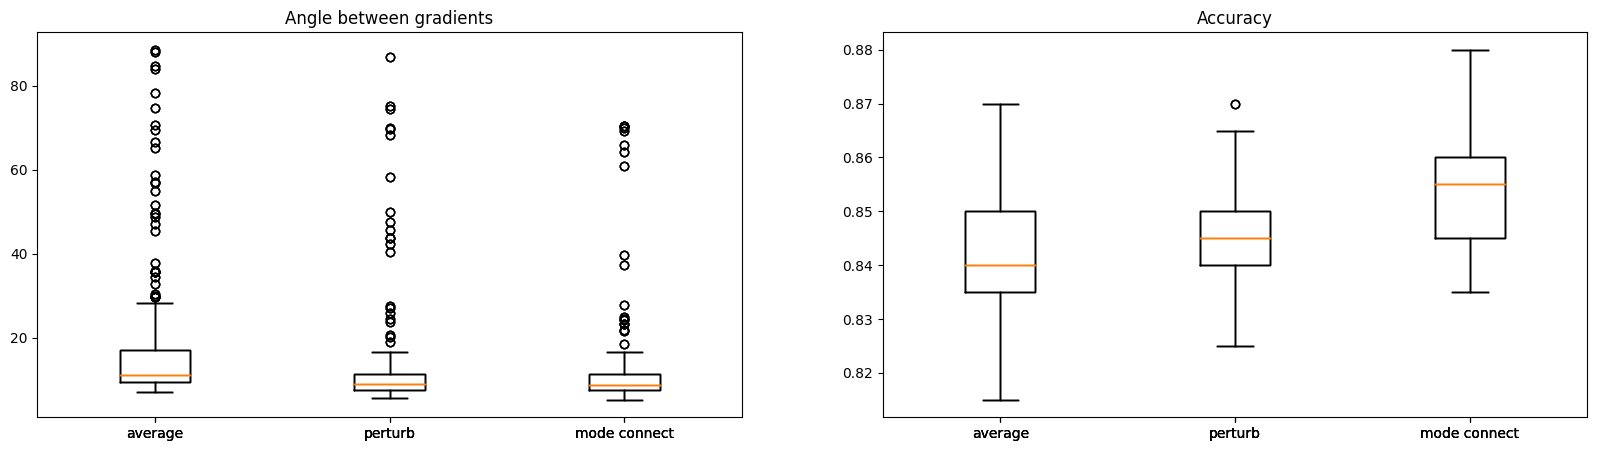

In [1348]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), dpi=100)
for i, method in enumerate(methods):
    ax[0].boxplot([angles[i] for i in range(len(methods))], labels=methods)
    ax[0].set_title('Angle between gradients')
    ax[1].boxplot([accs[i] for i in range(len(methods))], labels=methods)
    ax[1].set_title('Accuracy')
plt.show()

# Heatmaps

In [ ]:
print(X_test[:, 0].min(), X_test[:, 0].max(), X_test[:, 1].min(), X_test[:, 1].max())
print(X_train[:, 0].min(), X_train[:, 0].max(), X_train[:, 1].min(), X_train[:, 1].max())

-1.3388963 2.6571114 -1.3832197 1.8396682
-1.9119579 2.9391654 -1.3969225 1.8355398


In [1324]:
x = np.linspace(-1, 2, 400)
y = np.linspace(-1.2, 1.6, 400)
xx, yy = np.meshgrid(x, y)
X = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)])
extent = [x.min(), x.max(), y.min(), y.max()]
ts = np.linspace(0, 1, 50)

### Predictions

In [ ]:
Z = np.zeros((n_models, *xx.shape))
Z_mode = np.zeros((n_models, *xx.shape))
Z_pert = np.zeros((n_models, *xx.shape))
for i in tqdm(range(n_models)):
    Z[i] = models[i](torch.FloatTensor(X)).detach().numpy()[:, 1].reshape(xx.shape)
    Z_mode[i] = mode_models[i].compute_logits(X, TabularModel, ts).mean(axis=0)[:, 1].reshape(xx.shape)
    Z_pert[i] = pert_models[i](torch.FloatTensor(X)).detach().numpy().mean(axis=0)[:, 1].reshape(xx.shape)

  2%|▎         | 5/200 [00:18<12:13,  3.76s/it]


KeyboardInterrupt: 

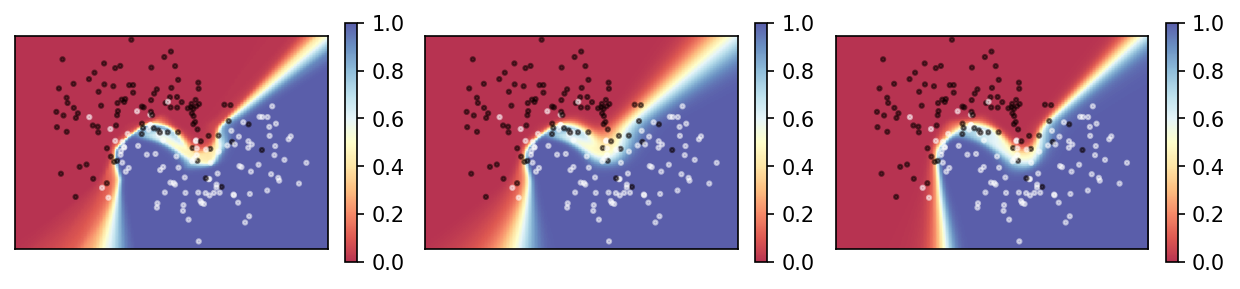

In [ ]:
# Plot heatmap of average prediction
fig, ax = plt.subplots(1, 3, figsize=(10, 5), dpi=150)
titles = ['Standard', 'Perturbed', 'Bezier']
for i, z in enumerate([Z, Z_pert, Z_mode]):
    im = ax[i].imshow(z.mean(axis=0), extent=extent, origin='lower', cmap='RdYlBu', alpha=0.8)
    fig.colorbar(im, fraction=0.035)
    # Scatter test data, dark red for class 0, dark blue for class 1


    ax[i].scatter(testset.data[:, 0], testset.data[:, 1], c=testset.labels, s=4, cmap='hot', alpha=0.5)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [ ]:
cols = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
        'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
        'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
for col in cols:
    # Plot heatmap of 5 models predictions
        model_idx = [94,133,64,161]#np.random.choice(n_models, 5, replace=False)
        s = 4
        back_alpha = 0.9
        cmap = col

        fig, ax = plt.subplots(2, 2, figsize=(10,6), dpi=150)
        fig.subplots_adjust(right=0.8)
        plt.subplots_adjust(wspace=0.035, hspace=0.1)
        for i, idx in enumerate(model_idx):
                zi = models[idx](torch.FloatTensor(X)).detach().numpy()[:, 1].reshape(xx.shape)
                im = ax[i//2,i%2].imshow(zi, extent=extent, origin='lower', cmap=cmap, alpha=back_alpha)
                ax[i//2,i%2].scatter(testset.data[:, 0], testset.data[:, 1], cmap='hot_r',  c=testset.labels, alpha=0.9, s=s)
                ax[i//2,i%2].set_xticks([])
                ax[i//2,i%2].set_yticks([])
        cbar_ax = fig.add_axes([0.815, 0.11, 0.02, 0.77])  # x, y, width, height
        fig.colorbar(im, cax=cbar_ax)
        for t in cbar_ax.get_yticklabels():
                t.set_fontsize(16)
        plt.suptitle('Model Variation due to Random Seed', fontsize=18, y=0.93, x=0.465)
        plt.show()

In [ ]:
from matplotlib import colors, colormaps
from matplotlib.colors import LinearSegmentedColormap
# Get red/blue colormap from matplotlib
cmap = colormaps['RdYlBu']
light_red = cmap(0.2)  # Adjust this value to get the desired shade of light red
yellow = cmap(0.5)  # This value is fixed
light_blue = cmap(0.8)  # Adjust this value to get the desired shade of light blue

# Create a custom colormap with the desired range
cols = [light_red, yellow, light_blue][::-1]  # Color list: [light_red, white, light_blue]
custom_cmap = LinearSegmentedColormap.from_list('custom_RdYlBu', cols)

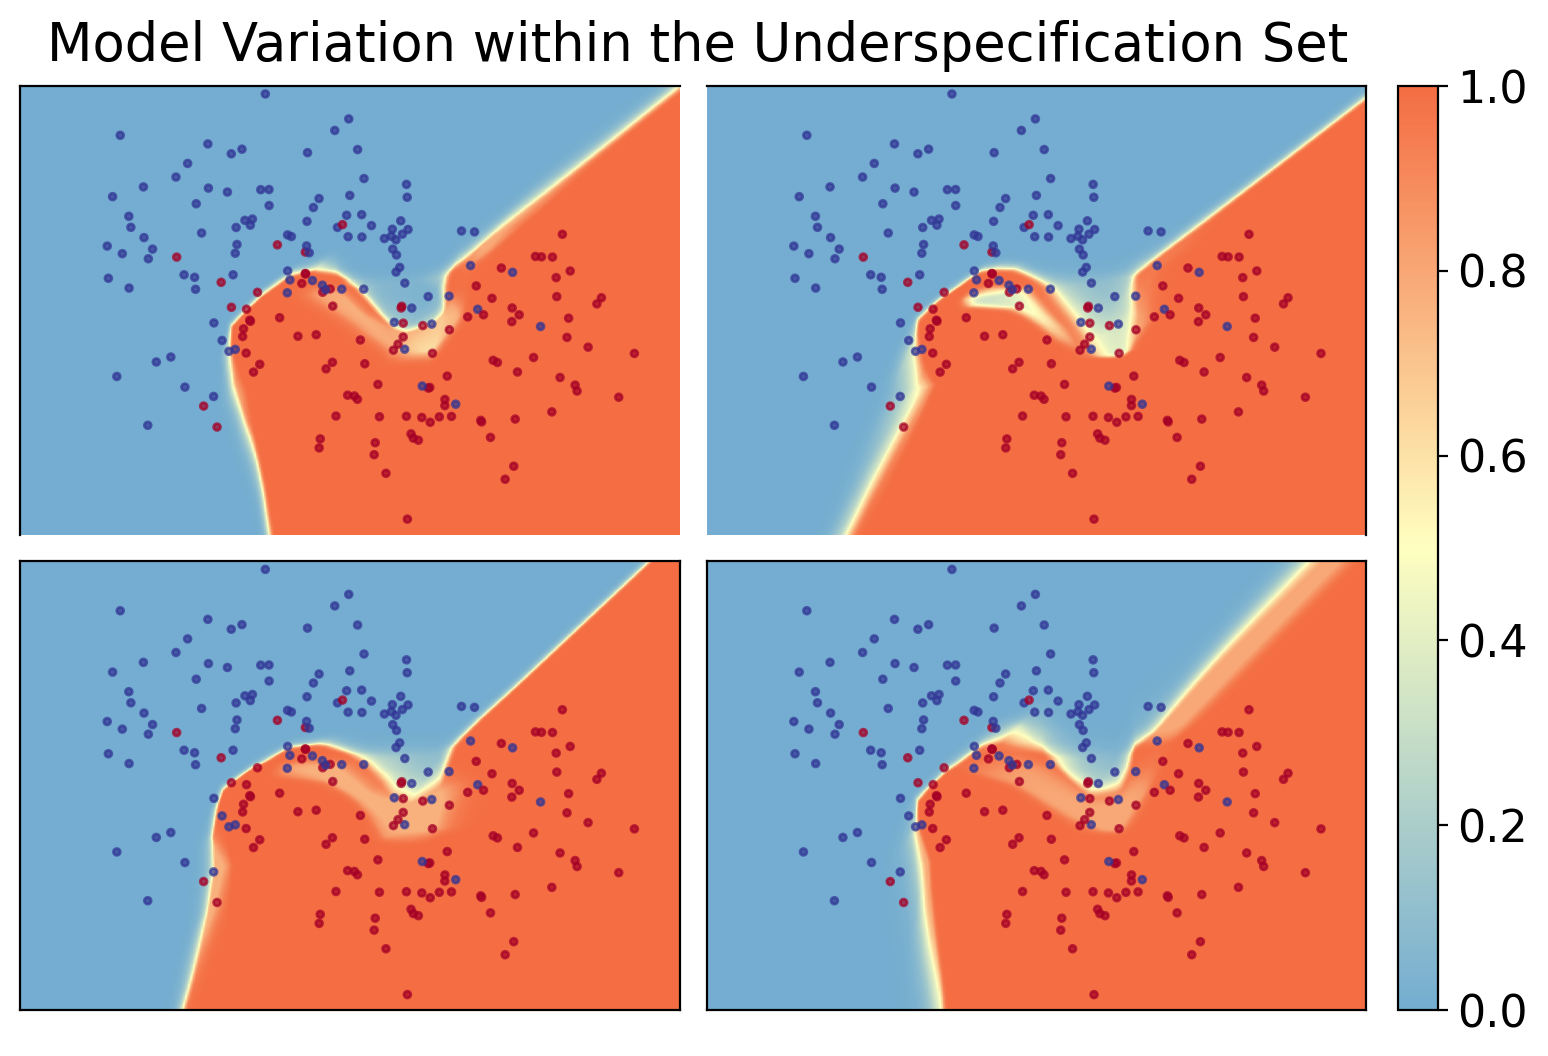

In [ ]:
# Plot heatmap of 5 models predictions
model_idx = [94,133,64,161]#np.random.choice(n_models, 5, replace=False)
s, alpha = 6, 0.7
back_alpha = 1
cmap = custom_cmap#'RdYlBu_r'

fig, ax = plt.subplots(2, 2, figsize=(10,6), dpi=200)
fig.subplots_adjust(right=0.8)
plt.subplots_adjust(wspace=0.035, hspace=0.06)
for i, idx in enumerate(model_idx):
    zi = models[idx](torch.FloatTensor(X)).detach().numpy()[:, 1].reshape(xx.shape)
    im = ax[i//2,i%2].imshow(zi**0.3, extent=extent, origin='lower', cmap=cmap, alpha=back_alpha)
    ax[i//2,i%2].scatter(testset.data[:, 0], testset.data[:, 1], cmap='RdYlBu',  c=1-testset.labels, alpha=alpha, s=s)
    ax[i//2,i%2].set_xticks([])
    ax[i//2,i%2].set_yticks([])
# Remove right and bottom border for ax[0,0]
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)
ax[0,1].spines['bottom'].set_visible(False)
cbar_ax = fig.add_axes([0.815, 0.11, 0.02, 0.77])  # x, y, width, height
fig.colorbar(im, cax=cbar_ax)
for t in cbar_ax.get_yticklabels():
     t.set_fontsize(16)
plt.suptitle('Model Variation within the Underspecification Set', fontsize=19, y=0.935, x=0.465)
plt.show()

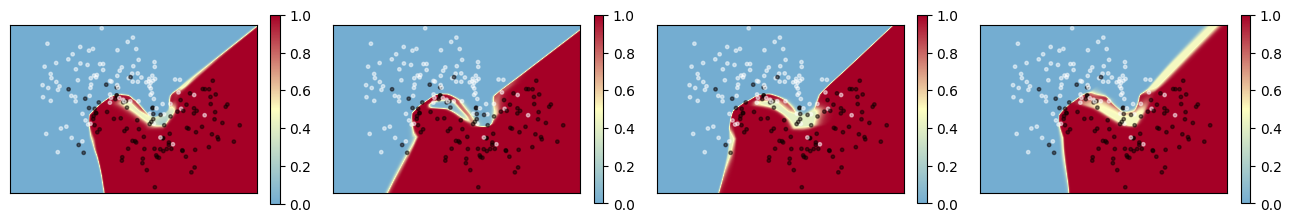

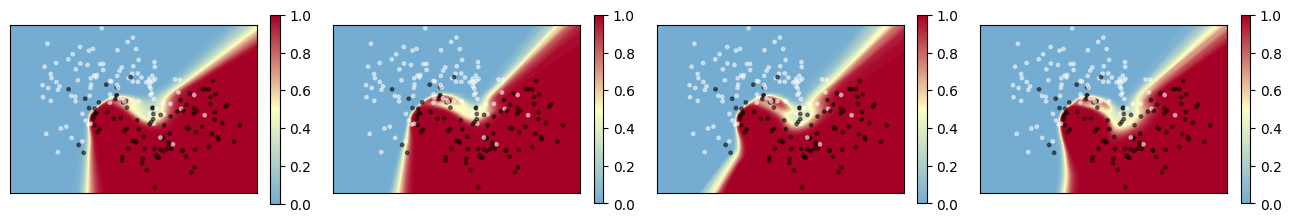

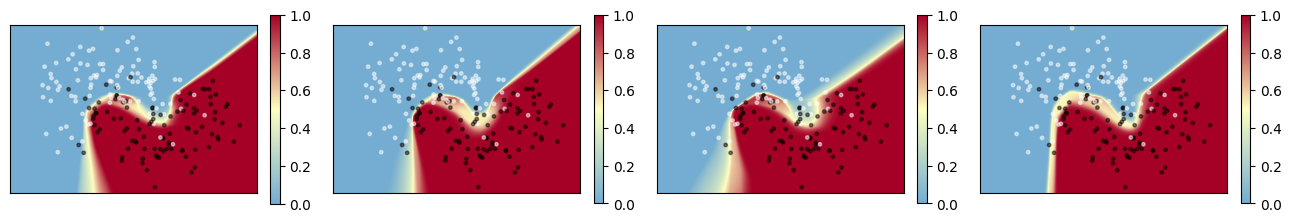

In [ ]:
# Plot heatmap of 5 models predictions
model_idx = [94,133,64,161]#np.random.choice(n_models, 5, replace=False)
s = 6
back_alpha = 1.0
cmap = custom_cmap#'RdYlBu'

fig, ax = plt.subplots(1, len(model_idx), figsize=(len(model_idx)*4, 5))
for i, idx in enumerate(model_idx):
    zi = models[idx](torch.FloatTensor(X)).detach().numpy()[:, 1].reshape(xx.shape)
    im = ax[i].imshow(zi, extent=extent, origin='lower', cmap=cmap, alpha=back_alpha)
    fig.colorbar(im, fraction=0.035)
    ax[i].scatter(testset.data[:, 0], testset.data[:, 1], cmap='hot_r',  c=testset.labels, alpha=0.5, s=s)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

fig, ax = plt.subplots(1, len(model_idx), figsize=(len(model_idx)*4, 5))
for i, idx in enumerate(model_idx):
    zi = pert_models[i](torch.FloatTensor(X)).detach().numpy()[:, :, 1].mean(axis=0).reshape(xx.shape)
    im = ax[i].imshow(zi, extent=extent, origin='lower', cmap=cmap, alpha=back_alpha)
    fig.colorbar(im, fraction=0.035)
    ax[i].scatter(testset.data[:, 0], testset.data[:, 1],  cmap='hot_r', c=testset.labels, alpha=0.5, s=s)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

fig, ax = plt.subplots(1, len(model_idx), figsize=(len(model_idx)*4, 5))
for i, idx in enumerate(model_idx):
    zi = mode_models[i].compute_logits(X, TabularModel, ts)[:, :, 1].mean(axis=0).reshape(xx.shape)
    im = ax[i].imshow(zi, extent=extent, origin='lower', cmap=cmap, alpha=back_alpha)
    fig.colorbar(im, fraction=0.035)
    ax[i].scatter(testset.data[:, 0], testset.data[:, 1], c=testset.labels, cmap='hot_r', alpha=0.5, s=s)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

### Ensembles

In [1325]:
def get_grads(method, idx):
    if method == 'average':
        grads = models[idx].compute_gradients(torch.FloatTensor(X), return_numpy=True)
    elif method == 'perturb':
        grads = pert_models[idx].compute_gradients(X, mean=True)
    elif method == 'mode connect':
        grads = mode_models[idx].compute_gradients(X, TabularModel, ts).mean(axis=0)
    return grads

In [1326]:
methods = ['average', 'perturb', 'mode connect']
grads_grid = np.zeros((len(methods), n_models, X.shape[0], 2))
from datasets.tabular import TabularModel
for i, method in enumerate(methods):
    for j in tqdm(range(n_models)):
        # Compute gradients
        grads_grid[i,j] = get_grads(method, j)

100%|██████████| 200/200 [06:57<00:00,  2.09s/it]


In [1327]:
# Parameters
ensemble_sizes = [1, 2, 4, 6, 8, 10]
n_trials = 20
k = 1

# Compute statistics
e_grads_grid = np.zeros((len(methods), len(ensemble_sizes), n_trials, X.shape[0], 2))
angles_grid = np.zeros((len(methods), len(ensemble_sizes), X.shape[0]))
cosines_grid = np.zeros((len(methods), len(ensemble_sizes), X.shape[0]))
# topk = np.zeros((len(methods), len(ensemble_sizes), n_trials, X.shape[0], k))
# signs = np.zeros((len(methods), len(ensemble_sizes), n_trials, X.shape[0], k), dtype=int)
# sa = np.zeros((len(methods), len(ensemble_sizes), X.shape[0]))

from datasets.tabular import TabularModel
for i, method in enumerate(methods):
    for j, ensemble_size in enumerate(tqdm(ensemble_sizes)):
        e_size = ensemble_size//2 if method == 'mode connect' else ensemble_size
        e_grads_grid[i,j] = grads_grid[i, :n_trials*e_size].reshape(n_trials, e_size, *X.shape).mean(axis=1)
        angles_grid[i,j] = average_pairwise_score_grad(e_grads_grid[i,j], angle_diff)
        cosines_grid[i,j] = average_pairwise_score_grad(e_grads_grid[i,j], cosine_similarity)
        # topk[i,j], signs[i,j] = get_top_k(k, e_grads[i,j], return_sign=True)
        # sa[i,j] = average_pairwise_score(topk[i,j], signs[i,j], top_k_sa)

  0%|          | 0/6 [00:00<?, ?it/s]/var/folders/_k/r6sz5_bj0z1084ltm3k4b3x80000gp/T/ipykernel_6410/2883837390.py:18: RuntimeWarning: Mean of empty slice.
  e_grads_grid[i,j] = grads_grid[i, :n_trials*e_size].reshape(n_trials, e_size, *X.shape).mean(axis=1)
/Users/lena/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
100%|██████████| 6/6 [00:05<00:00,  1.05it/s]


In [1328]:
def plot_methods(sim, idx, vmin, vmax, sep, scale=2.5, cmap='RdYlGn_r'):
    v = np.arange(vmin, vmax, sep)
    for j, method in enumerate(methods):
        fig, ax = plt.subplots(1, len(ensemble_sizes), figsize=(4*len(ensemble_sizes), 3), dpi=150)
        plt.subplots_adjust(wspace=0.2)
        for i, ensemble_size in enumerate(ensemble_sizes):
            Z = sims[sim][j,i].reshape(xx.shape)
            im = ax[i].imshow(Z, vmin=vmin, vmax=vmax, extent=extent, origin='lower', cmap=cmap)
            fig.colorbar(im, ax=ax[i], fraction=0.035, boundaries=v)
            pg = e_grads_grid[j, i, :, idx]
            norm = np.linalg.norm(pg, axis=1)
            # Convert norm to range 0.5, 1
            norm = (norm - norm.min()) / (norm.max() - norm.min()) + 0.5
            pg = pg / np.linalg.norm(pg, axis=1, keepdims=True)
            pg = pg * norm[:, None]
            ax[i].quiver(np.repeat(X[idx,0], n_trials), np.repeat(X[idx,1], n_trials),
                        pg[:,0], pg[:, 1], angles='xy', scale_units='xy', scale=scale, color='black')
            ax[i].set_title(f'Ensemble size: {ensemble_size}')
            ax[i].set_xticks([]); ax[i].set_yticks([])
        plt.suptitle(f'Average pairwise {sim} difference ({titles[j]})')
        plt.show()

titles = ['Average', 'Perturb', 'Mode Connect']
sims = {'angle difference': angles_grid,
        'cosine similarity': cosines_grid,
        'sign agreement': sa}

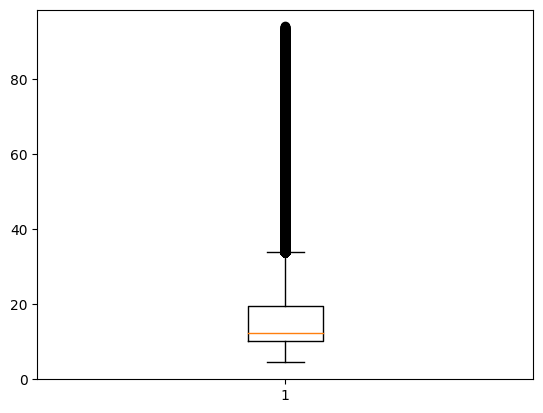

In [1329]:
plt.boxplot(angles_grid[0,0])
plt.show()

In [ ]:
ensemble_sizes_plot = []
fig, ax = plt.subplots(1, len(ensemble_sizes), figsize=(4*len(ensemble_sizes), 3), dpi=150)
plt.subplots_adjust(wspace=0.2)
for i, ensemble_size in enumerate(ensemble_sizes):
    Z = sims[sim][j,i].reshape(xx.shape)
    im = ax[i].imshow(Z, vmin=vmin, vmax=vmax, extent=extent, origin='lower', cmap=cmap)
    fig.colorbar(im, ax=ax[i], fraction=0.035, boundaries=v)
    pg = e_grads_grid[j, i, :, idx]
    norm = np.linalg.norm(pg, axis=1)
    # Convert norm to range 0.5, 1
    norm = (norm - norm.min()) / (norm.max() - norm.min()) + 0.5
    pg = pg / np.linalg.norm(pg, axis=1, keepdims=True)
    pg = pg * norm[:, None]
    ax[i].quiver(np.repeat(X[idx,0], n_trials), np.repeat(X[idx,1], n_trials),
                pg[:,0], pg[:, 1], angles='xy', scale_units='xy', scale=scale, color='black')
    ax[i].set_title(f'Ensemble size: {ensemble_size}')
    ax[i].set_xticks([]); ax[i].set_yticks([])
plt.suptitle(f'Average pairwise {sim} difference ({titles[j]})')
plt.show()

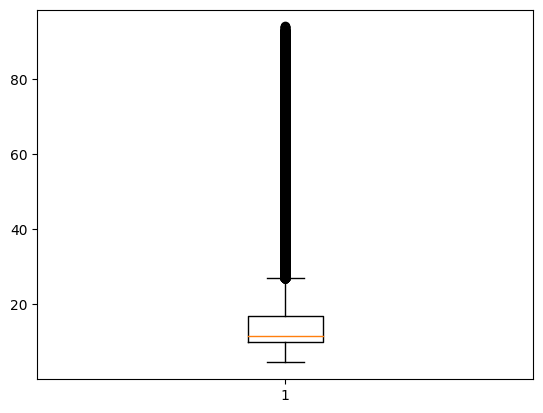

In [ ]:
plt.boxplot(angles_grid[0,0])
plt.show()

In [1349]:
idx = right_idx[3]
vmin, vmax = 0, 91
sep = 10
z = angles_grid[0,0].reshape(xx.shape)
pg = e_grads_grid[0,0, :, idx]
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(z, vmin=vmin, vmax=vmax, extent=extent, origin='lower', cmap='RdYlBu_r')
plt.colorbar(fraction=0.0314, boundaries=np.arange(vmin, vmax, sep))
plt.quiver(np.repeat(X[idx,0], n_trials), np.repeat(X[idx,1], n_trials),
            pg[:,0], pg[:, 1], angles='xy', scale_units='xy', scale=8, color='black', alpha=0.75)
plt.title('Angular Difference between Ensemble Gradients', fontweight='bold')
plt.xticks([]); plt.yticks([])
# no plot border
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 0

In [1331]:
idxs = np.argsort(angles_grid[0,0])[-20:][::-1]
idxs
left_idx = idxs[idxs % 400 < 201]
right_idx = idxs[idxs % 400 > 200]
left_idx, right_idx

(array([90132, 94957, 89731, 50931, 90534, 50932, 94958, 89732, 53327,
        51331, 89733, 52928, 53328, 53727, 90133, 50533, 90137, 54126,
        51330, 90134]),
 array([], dtype=int64))

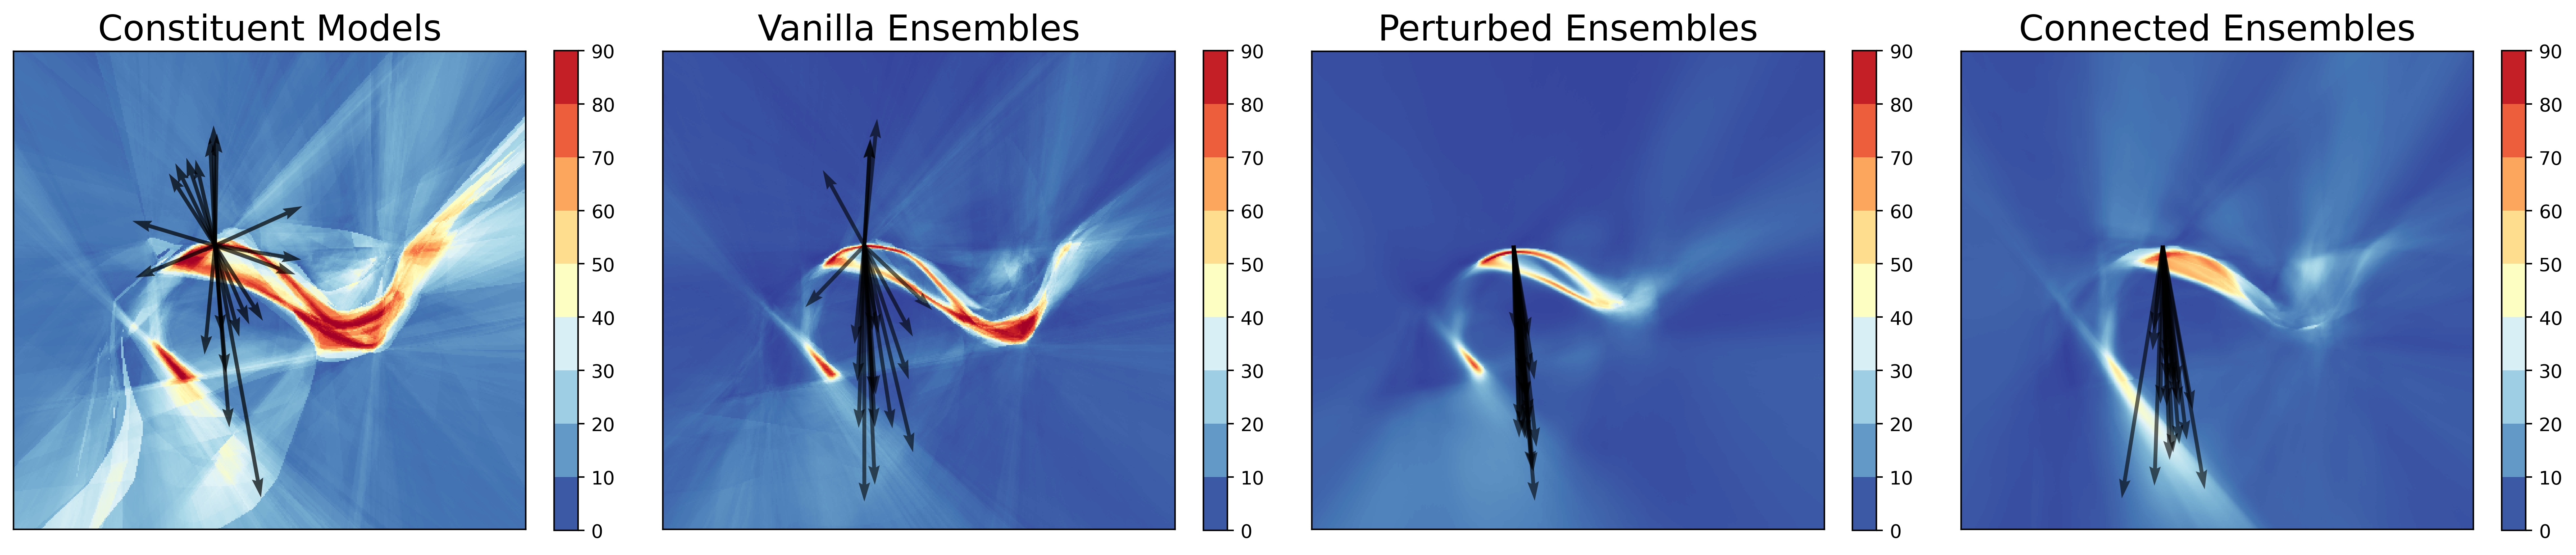

In [1344]:
idx = left_idx[1]
vmin, vmax, sep = 0, 91, 10
v = np.arange(vmin, vmax, sep)
ensemble_size = 4
e_idx = ensemble_sizes.index(ensemble_size)
ijs = [[0,0], [0,e_idx], [1,e_idx], [2,e_idx]]  # (method, ensemble) index pairs e.g. mode connect, size 2 would be (2,1)

fig, ax = plt.subplots(1, 4, figsize=(6*len(ijs), 6), dpi=400)
plt.subplots_adjust(wspace=0.15)

method_titles = ['Vanilla', 'Perturbed', 'Connected']
n_grads_plot = 15

for i, (m_i, e_i) in enumerate(ijs):
    zi = angles_grid[m_i, e_i].reshape(xx.shape)
    im = ax[i].imshow(zi, vmin=vmin, vmax=vmax, extent=extent, origin='lower', cmap='RdYlBu_r')
    fig.colorbar(im, ax=ax[i], fraction=0.0425, boundaries=v)
    pg = e_grads_grid[m_i, e_i, :, idx]
    norm = np.linalg.norm(pg, axis=1)
    # Convert norm to range 0.5, 1
    norm = (norm - norm.min()) / (norm.max() - norm.min()) + 0.5
    pg = pg / np.linalg.norm(pg, axis=1, keepdims=True)
    pg = pg * norm[:, None]
    ax[i].quiver(np.repeat(X[idx,0], n_trials), np.repeat(X[idx,1], n_trials),
                pg[:,0], pg[:, 1], angles='xy', scale_units='xy', scale=1, color='black', alpha=0.7-0.1*(i>0))
    if e_i == 0:
        ax[i].set_title('Constituent Models', fontsize=19)
    else:
        ax[i].set_title(f'{method_titles[m_i]} Ensembles', fontsize=19)
    ax[i].set_xticks([]); ax[i].set_yticks([])
# plt.suptitle(f'Average pairwise angular difference between gradients (ensembles of size {ensemble_size})',
#              y=0.84, fontsize=16)
plt.show()

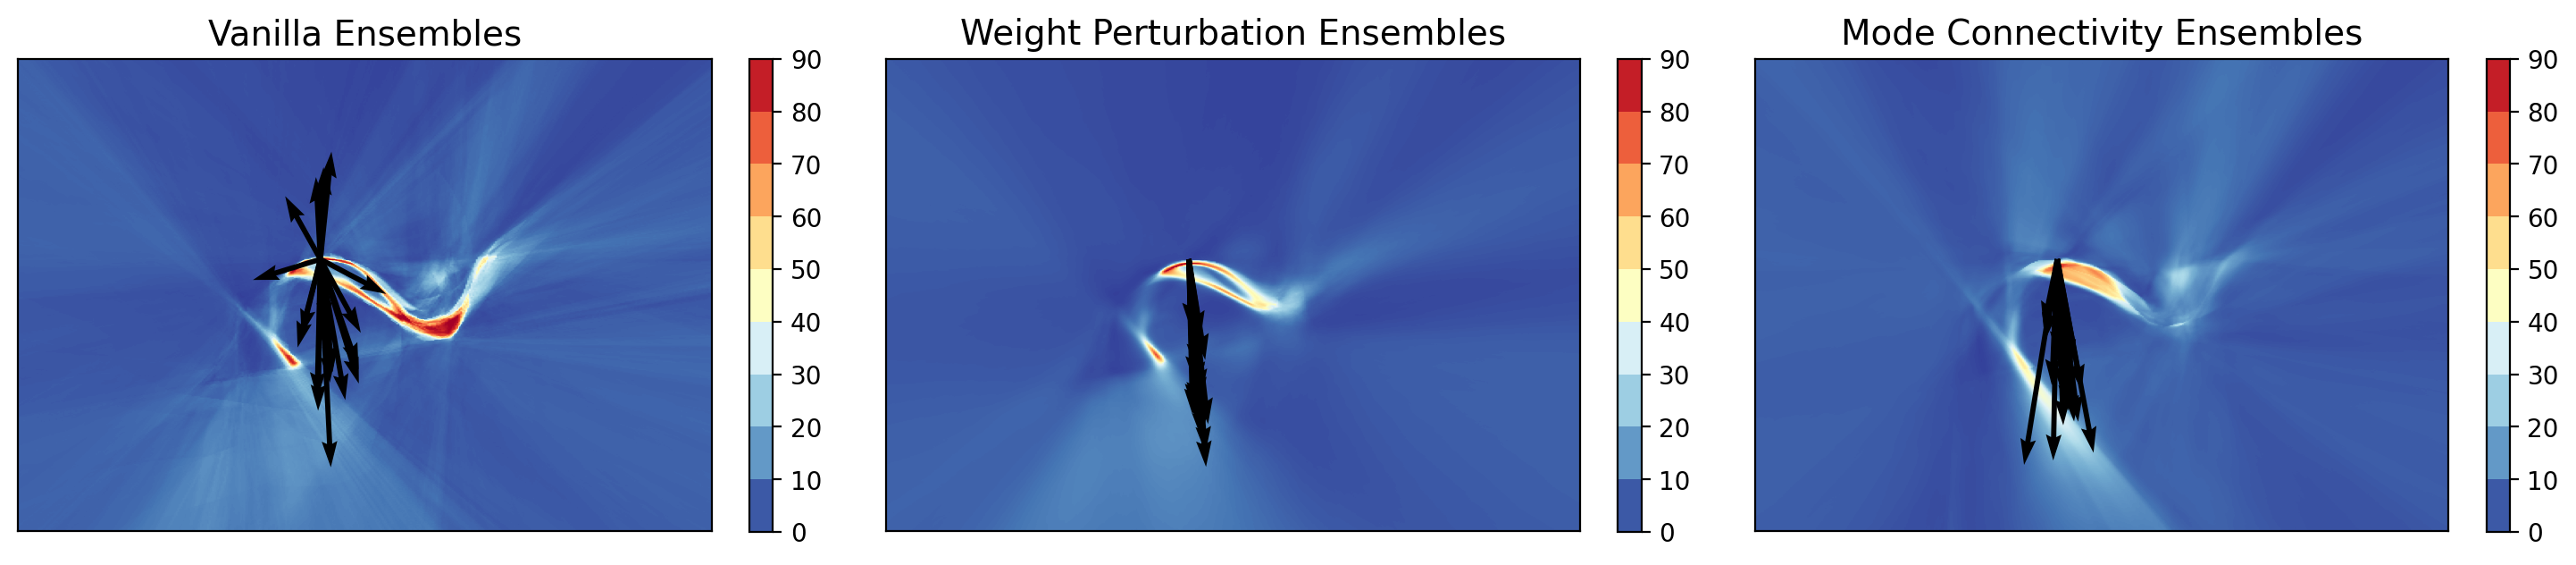

In [ ]:
idx = left_idx[0]
vmin, vmax, sep = 0, 91, 10
v = np.arange(vmin, vmax, sep)
ensemble_size = 4
e_idx = ensemble_sizes.index(ensemble_size)
ijs = [[0,e_idx], [1,e_idx], [2,e_idx]]  # (method, ensemble) index pairs e.g. mode connect, size 2 would be (2,1)

fig, ax = plt.subplots(1, len(ijs), figsize=(6*len(ijs), 6), dpi=200)
plt.subplots_adjust(wspace=0.15)

method_titles = ['Vanilla', 'Weight Perturbation', 'Mode Connectivity']

for i, (m_i, e_i) in enumerate(ijs):
    zi = angles_grid[m_i, e_i].reshape(xx.shape)
    im = ax[i].imshow(zi, vmin=vmin, vmax=vmax, extent=extent, origin='lower', cmap='RdYlBu_r')
    fig.colorbar(im, ax=ax[i], fraction=0.0313, boundaries=v)
    pg = e_grads_grid[m_i, e_i, :, idx]
    norm = np.linalg.norm(pg, axis=1)
    # Convert norm to range 0.5, 1
    norm = (norm - norm.min()) / (norm.max() - norm.min()) + 0.5
    pg = pg / np.linalg.norm(pg, axis=1, keepdims=True)
    pg = pg * norm[:, None]
    ax[i].quiver(np.repeat(X[idx,0], n_trials), np.repeat(X[idx,1], n_trials),
                pg[:,0], pg[:, 1], angles='xy', scale_units='xy', scale=1, color='black')
    ax[i].set_title(f'{method_titles[m_i]} Ensembles', fontsize=14)
    ax[i].set_xticks([]); ax[i].set_yticks([])
# plt.suptitle(f'Average pairwise angular difference between gradients (ensembles of size {ensemble_size})',
#              y=0.84, fontsize=16)
plt.show()

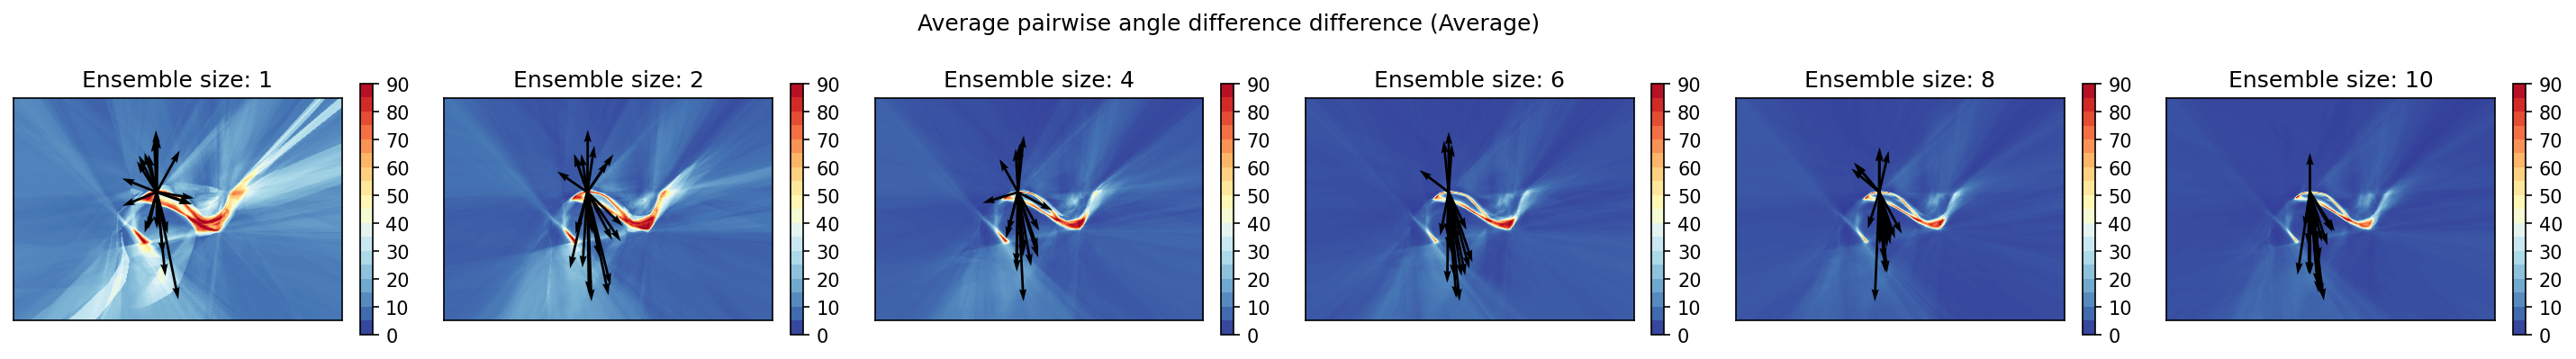

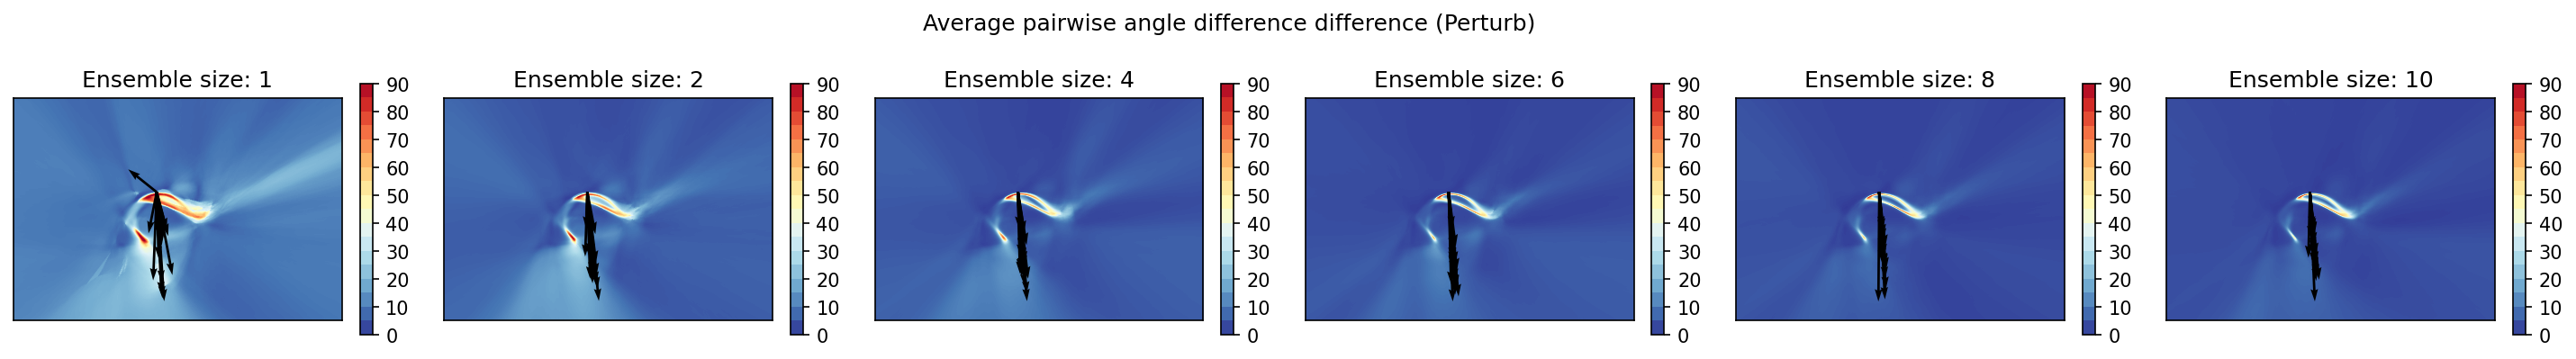

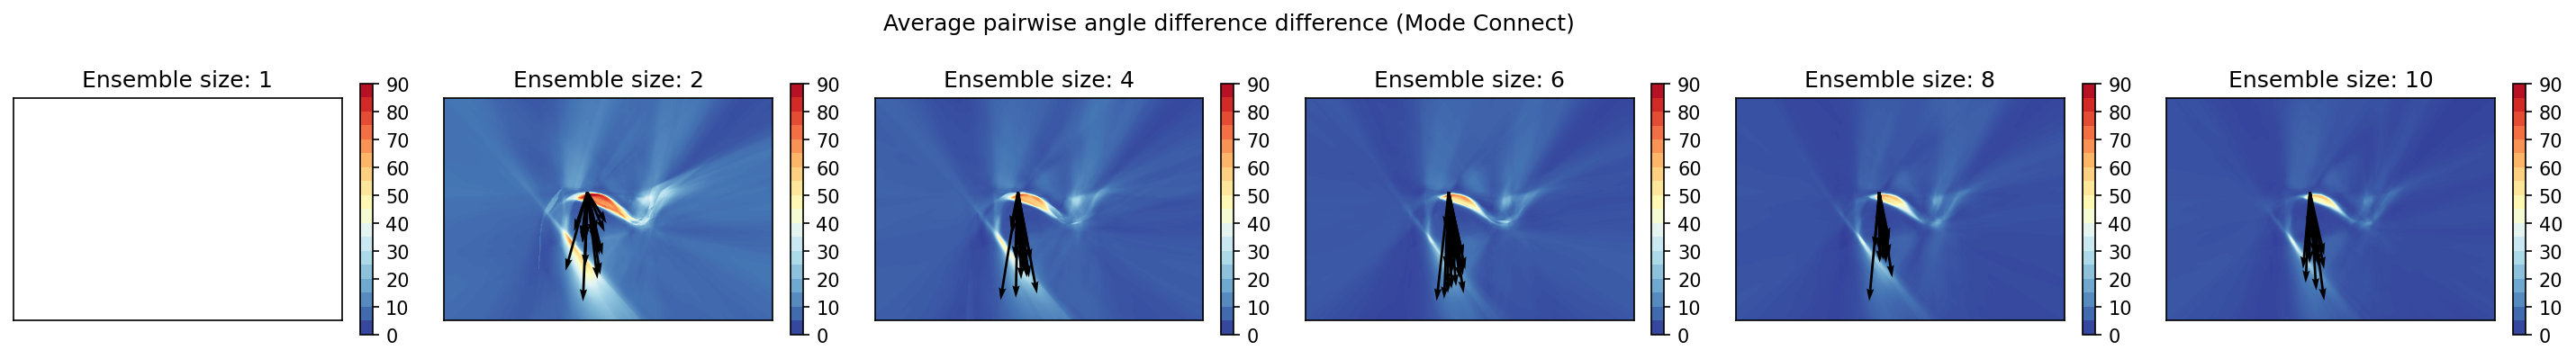

In [ ]:
# Plot heatmap of angles
idx = right_idx[0]
vmin, vmax = 0, 91
sep = 5
plot_methods('angle difference', idx, vmin, vmax, sep, scale=0.9, cmap='RdYlBu_r')

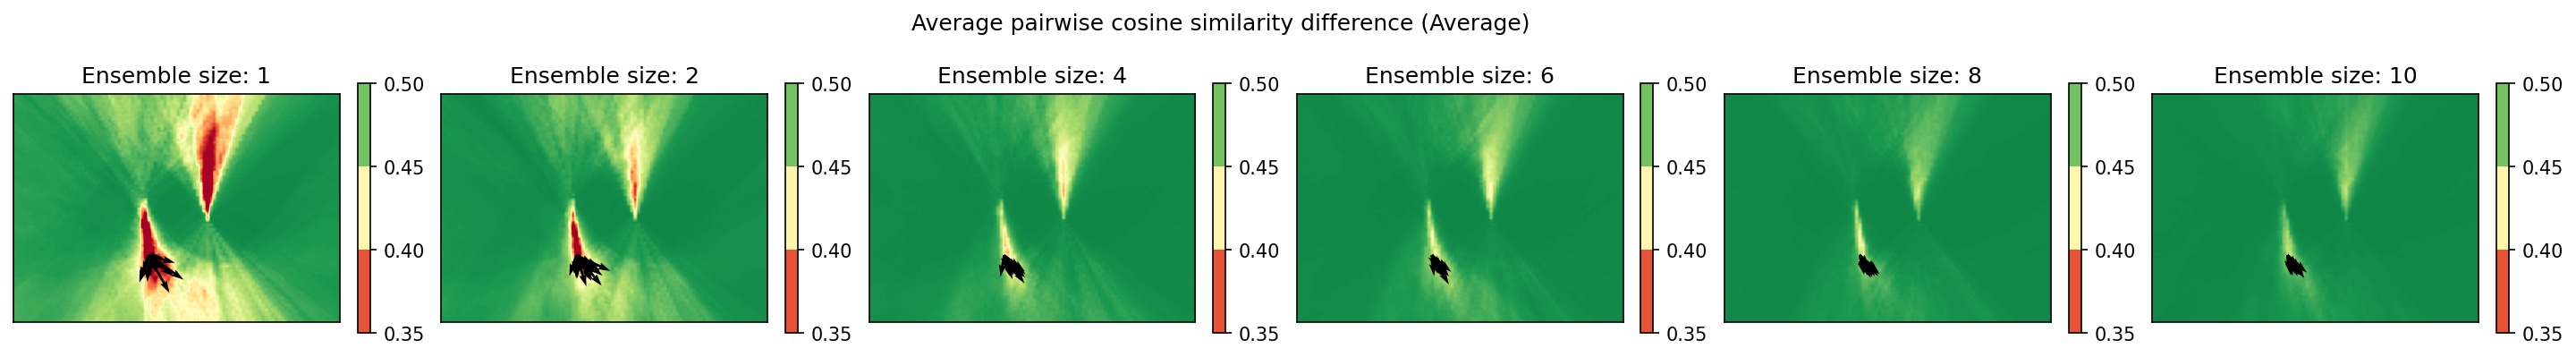

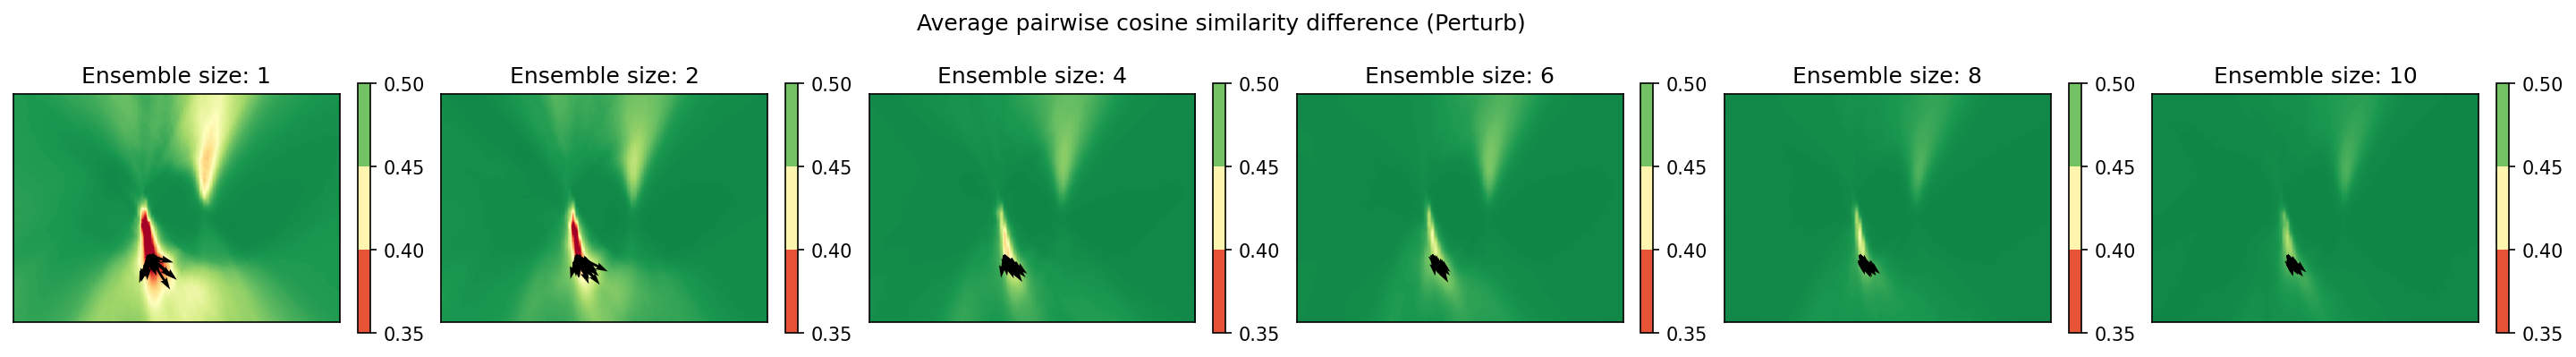

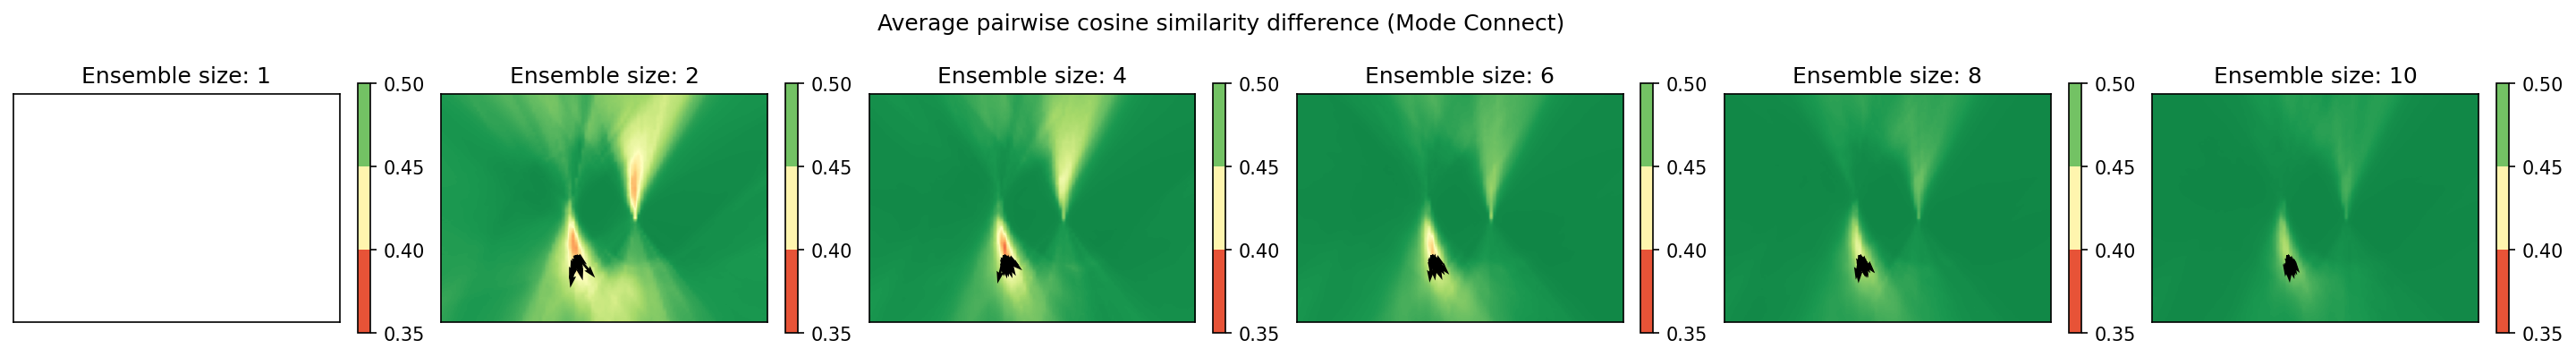

In [ ]:
# Plot heatmap of cosine similarities
idx = np.argmin(cosines[0,0])
vmin, vmax = 0.35, 0.51
sep = 0.05
plot_methods('cosine similarity', idx, vmin, vmax, sep, scale=5, cmap='RdYlGn')

IndexError: index 5 is out of bounds for axis 1 with size 5

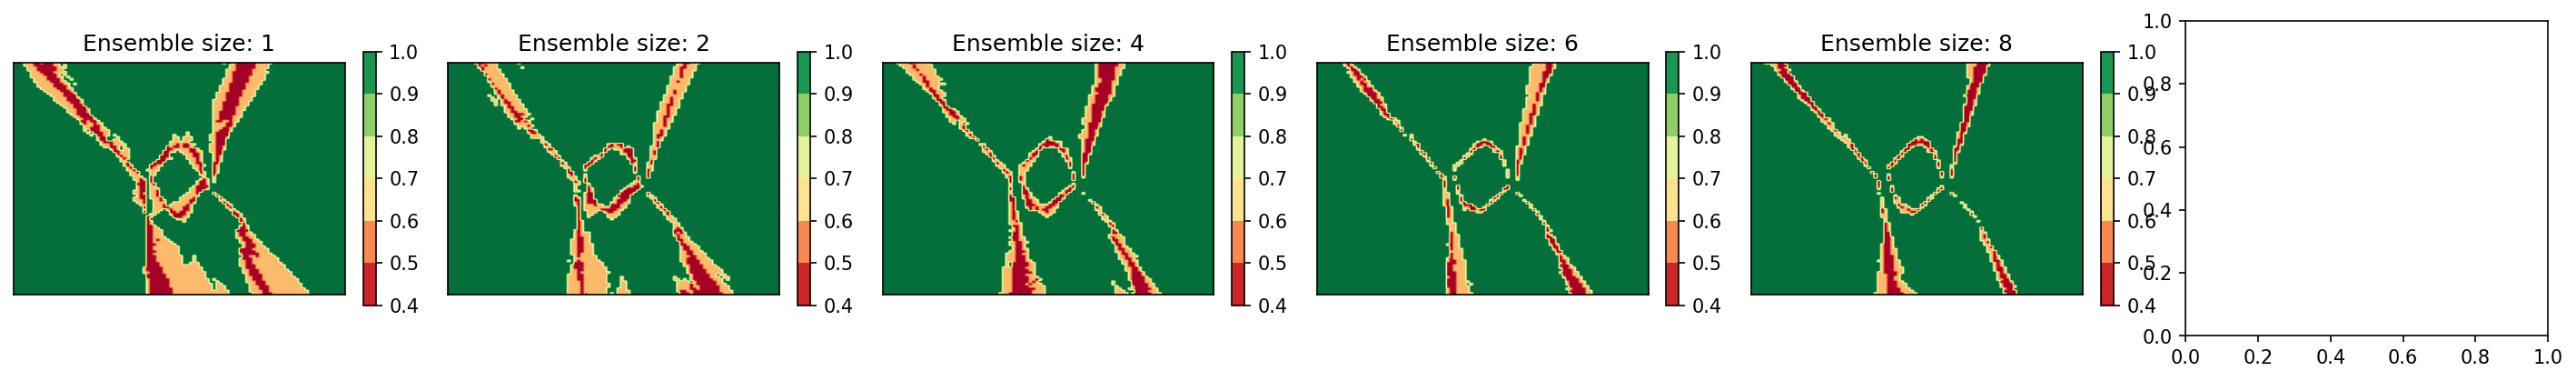

In [ ]:
# Plot heatmap of sign agreements
idx = np.argmin(sa[0,0])
vmin, vmax = 0.4, 1.01
sep = 0.1
plot_methods('sign agreement', idx, vmin, vmax, sep, scale=5, cmap='RdYlGn')

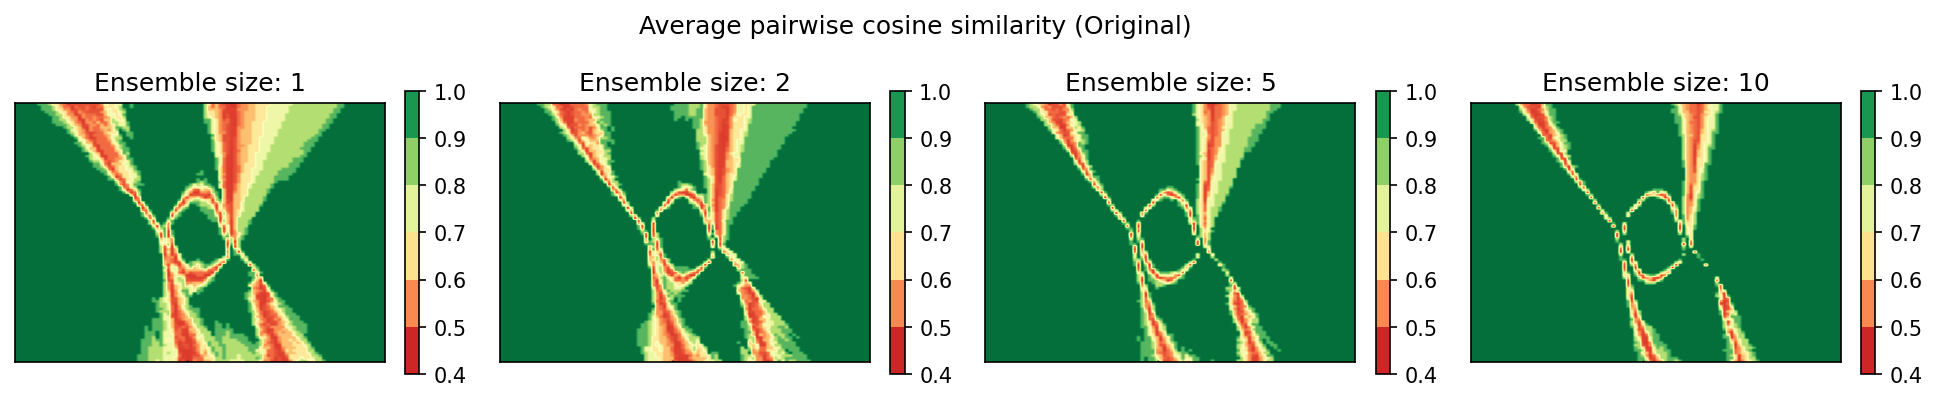

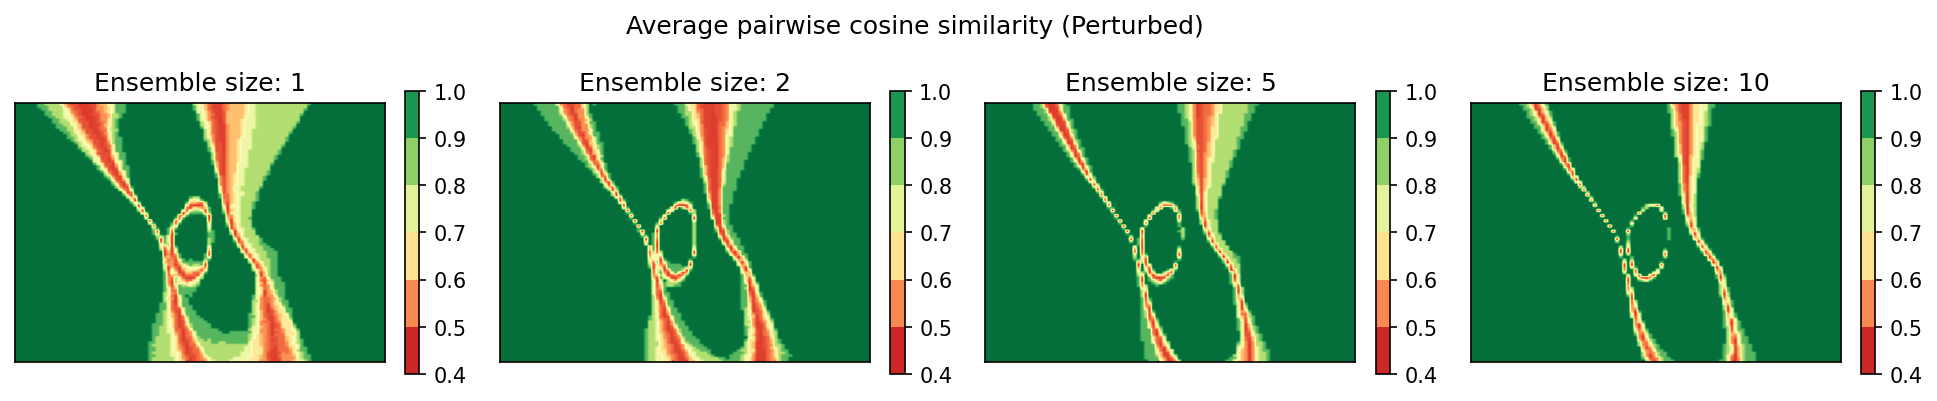

In [ ]:
# Plot heatmap of angles
titles = ['Original', 'Perturbed']
idx = np.argmin(sa[0])
sims = [sa, sa_perturb]
sim_grads = [e_grads, e_grads_perturb]
vmin, vmax = 0.4, 1.01
sep = 0.1
v = np.arange(vmin, vmax, sep)
for j, sim in enumerate(sims):
    fig, ax = plt.subplots(1, len(ensemble_sizes), figsize=(4*len(ensemble_sizes), 3), dpi=150)
    plt.subplots_adjust(wspace=0.2)
    for i, ensemble_size in enumerate(ensemble_sizes):
        Z = sim[i].reshape(xx.shape)
        im = ax[i].imshow(Z, vmin=vmin, vmax=vmax, extent=extent, origin='lower', cmap='RdYlGn')
        fig.colorbar(im, fraction=0.035, boundaries=v)
        ax[i].quiver(np.repeat(X[idx,0], n_trials), np.repeat(X[idx,1], n_trials),
                     sim_grads[j][i, :, idx, 0], sim_grads[j][i, :, idx, 1],
                     angles='xy', scale_units='xy', scale=2.5, color='black')
        ax[i].set_title(f'Ensemble size: {ensemble_size}')
        ax[i].set_xticks([]); ax[i].set_yticks([])
    plt.suptitle(f'Average pairwise cosine similarity ({titles[j]})')
    plt.show()

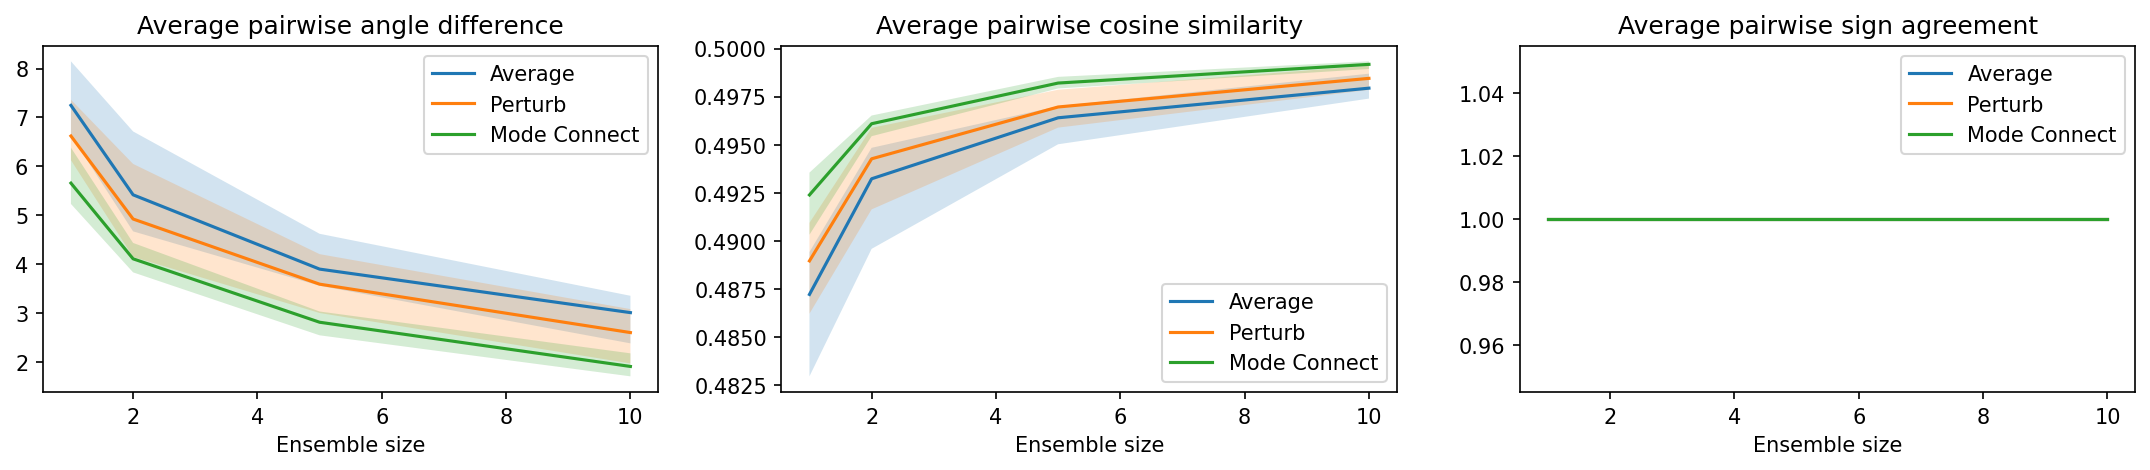

In [ ]:
fig, ax = plt.subplots(1, len(sims), figsize=(6*len(sims), 3), dpi=150)
for i, sim in enumerate(sims):
    for j, method in enumerate(methods):
        q = np.quantile(sims[sim][j], [0.4, 0.5, 0.6], axis=1)
        ax[i].plot(ensemble_sizes, q[1], label=titles[j])
        ax[i].fill_between(ensemble_sizes, q[0], q[2], alpha=0.2)
    ax[i].set_xlabel('Ensemble size')
    ax[i].set_title(f'Average pairwise {sim}')
    ax[i].legend()
plt.show()

### Misc

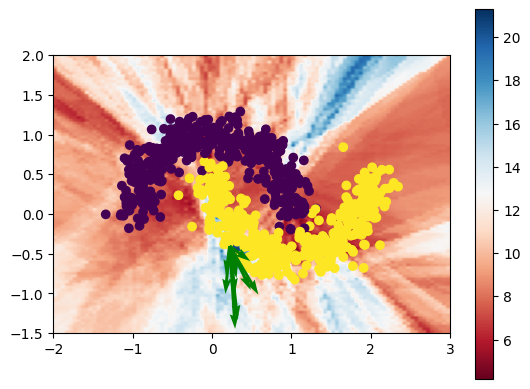

In [ ]:
# Plot heatmap of sa
idx = 3144
Z = angles.reshape(xx.shape)
plt.imshow(Z, extent=[-2, 3, -1.5, 2], origin='lower', cmap='RdBu')
plt.colorbar()
plt.scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
plt.quiver(np.repeat(X[idx,0], n_models), np.repeat(X[idx,1], n_models), grads[:, idx, 0], grads[:, idx, 1], scale=15, color='green')
plt.show()

In [ ]:
k = 1
tk, s = get_top_k(k, grads, return_sign=True)
sa = average_pairwise_score(tk, s, top_k_sa)

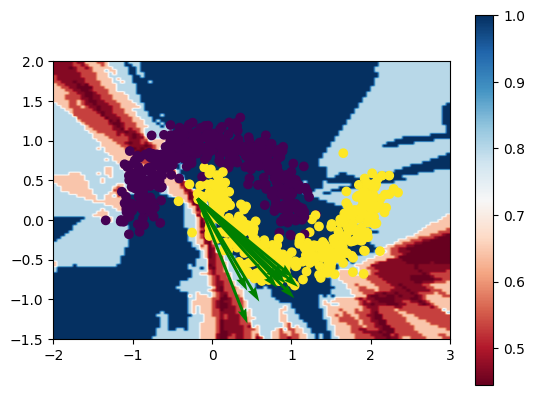

In [ ]:
# Plot heatmap of sa
Z = sa.reshape(xx.shape)
plt.imshow(Z, extent=[-2, 3, -1.5, 2], origin='lower', cmap='RdBu')
plt.colorbar()
plt.scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
plt.quiver(np.repeat(X[idx,0], n_models), np.repeat(X[idx,1], n_models), grads[:, idx, 0], grads[:, idx, 1], scale=15, color='green')
plt.show()

# Modconn

In [ ]:
from modconn.curves import train_curve
from modconn import curves
from datasets.tabular import TabularModelCurve
layers = datasets.tabular.layers['moons']
model_args = [n_features, layers]
model_args

[2, [128, 64, 16]]

In [ ]:
def mode_connect(models, trainloader, lr, epochs, curve_type='polychain', optim='sgd',
                 ts=np.linspace(0, 1, 101), disable_tqdm=True, fix_start=False, fix_end=False):
    if curve_type == 'polychain':
        curve_type = curves.PolyChain
    elif curve_type == 'bezier':
        curve_type = curves.Bezier
    else:
        raise ValueError(f'Unknown curve type {curve_type}')
    p_curve = curves.train_curve(models=models, trainloader=trainloader,
                                 curve_class=TabularModelCurve, curve=curve_type,
                                 input_size=model_args[0], hidden_layers=model_args[1],
                                 fix_start=fix_start, fix_end=fix_end, optim=optim,
                                 lr=lr, epochs=epochs, disable_tqdm=disable_tqdm)
    # Compute gradients
    p_curve_logits = p_curve.compute_logits(X_test, TabularModel, ts)
    p_curve_grads = p_curve.compute_gradients(X_test, TabularModel, ts)
    return p_curve, p_curve_logits, p_curve_grads

def init_model(idx):
    torch.manual_seed(idx)
    model = TabularModel(*model_args)
    return model

In [ ]:
def get_curve_statistics(p_curve, ts=np.linspace(0,1,101)):
    # Compute losses
    loss_fn = torch.nn.functional.cross_entropy
    p_curve_loss = np.zeros(len(ts))
    p_curve_loss_tr = np.zeros(len(ts))
    p_curve_preds_tr = np.zeros((len(ts), *y_train.shape))
    p_curve_grads_tr = np.zeros((len(ts), *X_train.shape))
    for i, t in enumerate(ts):
        model = p_curve.get_model_from_curve(TabularModel, t=t)
        p_curve_loss[i] = loss_fn(model.forward(torch.FloatTensor(X_test)), torch.tensor(y_test)).item()
        p_curve_loss_tr[i] = loss_fn(model.forward(torch.FloatTensor(X_train)), torch.tensor(y_train)).item()
        p_curve_preds_tr[i] = model.predict(X_train, return_numpy=True)
        p_curve_grads_tr[i] = model.compute_gradients(X_train, return_numpy=True)
    weight_norms = np.zeros(len(ts))
    weight_diffs = np.zeros(len(ts))
    model_0 = p_curve.get_model_from_curve(TabularModel, t=0)
    for i, t in enumerate(ts):
        model_t = p_curve.get_model_from_curve(TabularModel, t=t)
        weight_norms[i] = get_weight_norm(model_t.state_dict())
        weight_diffs[i] = get_weight_diff(model_t.state_dict(), model_0.state_dict())
    return p_curve_loss, p_curve_loss_tr, p_curve_preds_tr, p_curve_grads_tr, weight_norms, weight_diffs

def plot_statistics(p_curve_loss, p_curve_loss_tr,
                    p_curve_preds, p_curve_preds_tr,
                    p_curve_grads, p_curve_grads_tr,
                    weight_norms, weight_diffs, ts=np.linspace(0,1,101)):
    fig, ax = plt.subplots(1, 5, figsize=(20, 4), dpi=150)
    ax[0].plot(ts, p_curve_loss, label='Test')
    ax[0].plot(ts, p_curve_loss_tr, label='Train')

    ax[1].plot(ts, 100*(p_curve_preds==y_test).mean(axis=1), label='Test')
    ax[1].plot(ts, 100*(p_curve_preds_tr==y_train).mean(axis=1), label='Train')

    q = np.quantile(np.linalg.norm(p_curve_grads, axis=2), [0.25, 0.5, 0.75], axis=1)
    ax[2].plot(ts, q[1], label='Test')
    ax[2].fill_between(ts, q[0], q[2], alpha=0.2)
    q = np.quantile(np.linalg.norm(p_curve_grads_tr, axis=2), [0.25, 0.5, 0.75], axis=1)
    ax[2].plot(ts, q[1], label='Train')
    ax[2].fill_between(ts, q[0], q[2], alpha=0.2)

    topk, signs = get_top_k(1, p_curve_grads, return_sign=True)
    gt_score = ground_truth_score(topk, signs, gt, signs_gt, top_k_sa)
    q = np.quantile(gt_score, [0.25, 0.5, 0.75], axis=1)
    ax[3].plot(ts, q[1], label='Test')
    ax[3].fill_between(ts, q[0], q[2], alpha=0.2)

    ax[4].plot(ts, weight_norms, label='Weight Norm')
    ax[4].plot(ts, weight_diffs, label='Weight Diff')

    titles = ['Loss', 'Accuracy (%)', 'Gradient Norm', 'Ground Truth SA Similarity', 'Weight Norm']
    for i in range(5):
        ax[i].set_xlabel('t')
        ax[i].legend()
        ax[i].set_title(titles[i])
    plt.show()

In [ ]:
grad = np.zeros((n_models, X_test.shape[0], 2))
for i in tqdm(range(n_models)):
    # Compute gradients
    grad[i] = models[i].compute_gradients(X_test, return_numpy=True)

100%|██████████| 200/200 [00:00<00:00, 2463.67it/s]


In [ ]:
gt, signs_gt = get_top_k(1, grad.mean(axis=0), return_sign=True)
tk, s = get_top_k(1, grad, return_sign=True)
orig_sa = average_ground_truth_score(tk, s, gt, signs_gt, top_k_sa)

In [ ]:
weights = linear_weight_interpolation(models[54].state_dict(), models[155].state_dict(), [0, 0.25, 0.5, 0.75, 1.0])
curve_models = []
for weight in weights:
    model = TabularModel(*model_args)
    model.load_state_dict(weight)
    curve_models.append(model)

In [ ]:
from align import align_tabular

In [ ]:
loader = torch.utils.data.DataLoader(trainset, 32, shuffle=True)
model = TabularModel(*model_args)
model.state_dict()['network.0.weight'][:3]

tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]])

In [ ]:
ts = np.linspace(0, 1, 50)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False)
model_0 = models[9]
model_1 = models[10]
model_a = align_tabular(model_0, model_1, trainloader, model_args)
curve_models = [model_a, model_1]

In [ ]:
print(get_weight_norm(model_0), get_weight_norm(model_1), get_weight_norm(model_a))
print(get_weight_diff(model_0, model_1), get_weight_diff(model_0, model_a), get_weight_diff(model_a, model_1))

11.01916587144307 11.120580690350929 11.019166063732413
15.713755501383567 15.597638490967881 9.890983136609254


In [ ]:
n_curves = 100
ts = np.linspace(0, 1, 50)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False)
p_curve_grads = np.zeros((n_curves, len(ts), X_test.shape[0], 2))
p_curves = []
for i in tqdm(range(n_curves)):
    model_0 = models[i*2]
    model_1 = models[i*2+1]
    model_a = align_tabular(model_0, model_1, trainloader, model_args)
    curve_models = [model_a, model_1]
    p_curve, p_curve_logits, p_curve_grads[i] = mode_connect(curve_models, trainloader=trainloader, lr=0.1, optim='sgd',
                                                        epochs=100, curve_type='bezier', ts=ts,
                                                        disable_tqdm=True, fix_start=False, fix_end=True)
    p_curves.append(p_curve)
    # outputs = get_curve_statistics(p_curve, ts=ts)
    # p_curve_loss, p_curve_loss_tr, p_curve_preds_tr, p_curve_grads_tr, weight_norms, weight_diffs = outputs
    # plot_statistics(p_curve_loss, p_curve_loss_tr, p_curve_logits.argmax(axis=2), p_curve_preds_tr,
    #                 p_curve_grads, p_curve_grads_tr, weight_norms, weight_diffs, ts=ts)

100%|██████████| 100/100 [03:51<00:00,  2.32s/it]


In [ ]:
len(pert_models)

200

In [ ]:
idx = 5858
x = X[idx:idx+1]
#p_curve = mode_models[8]
pg = grads[0,:198,idx].reshape(3, 66, 2).mean(axis=0)
pg_mode = np.zeros((n_curves, 2))
pg_pert = np.zeros((len(pert_models), 2))
for i in tqdm(range(n_curves)):
    pg_mode[i] = p_curves[i].compute_gradients(x, TabularModel, ts=np.linspace(0,1,100))[:,0].mean(axis=0)
for i in tqdm(range(len(pert_models))):
    pg_pert[i] = pert_models[i].compute_gradients(x, mean=True)
pg_pert = pg_pert[:198].reshape(3, 66, 2).mean(axis=0)
pg_mode = pg_mode[:66]
x = x[0]

100%|██████████| 200/200 [00:01<00:00, 109.63it/s]


In [ ]:
def x_angle(g):
    angs = np.zeros(len(g))
    for i in range(len(g)):
        angs[i] = np.arctan(g[i,1]/g[i,0])*180/np.pi
    return angs

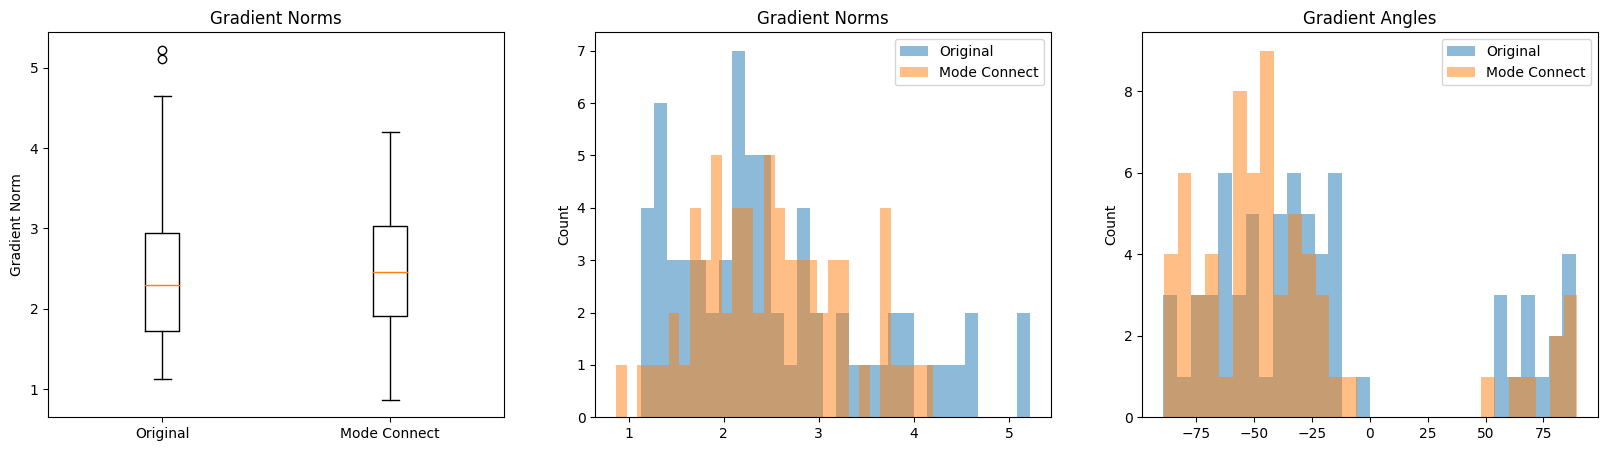

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), dpi=100)
method_grads = [pg_mode, pg]
ax[0].boxplot([np.linalg.norm(g, axis=1) for g in method_grads],
             labels=['Original', 'Mode Connect'])
ax[0].set_title('Gradient Norms')
for g in method_grads:
    ax[1].hist(np.linalg.norm(g, axis=1), bins=30, alpha=0.5)
    ax[2].hist(x_angle(g), bins=30, alpha=0.5)
ax[0].set_ylabel('Gradient Norm')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')
ax[1].legend(['Original', 'Mode Connect'])
ax[2].legend(['Original', 'Mode Connect'])
ax[1].set_title('Gradient Norms')
ax[2].set_title('Gradient Angles')
plt.show()

In [ ]:
pg.shape, pg_mode.shape, pg_pert.shape

((66, 2), (100, 2), (66, 2))

In [ ]:
pg_mode.shape

(66, 2)

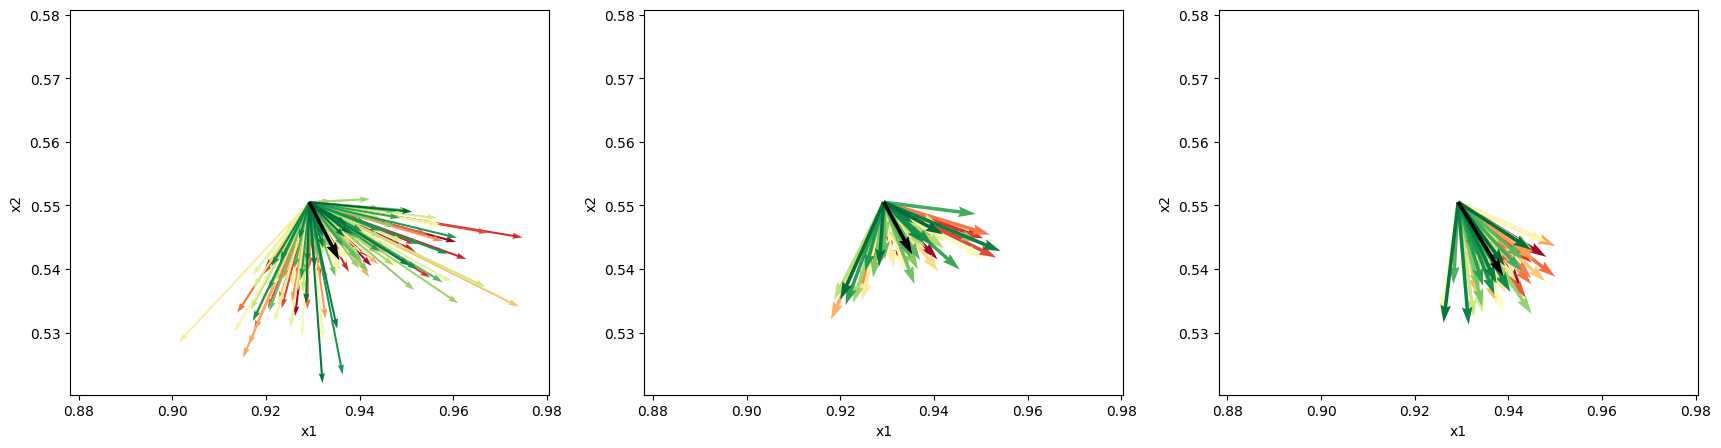

In [ ]:
quiver_plots([grads[0,:,idx], pg_mode, pg_pert], x, scale=200)

In [ ]:
def quiver_plot(pg, x, scale=1.0):
    # Plot the gradients in pg as a quiver plot at x
    n_grads = pg.shape[0]
    plt.quiver(np.repeat(x[0], n_grads),
               np.repeat(x[1], n_grads),
               pg[:,0], pg[:,1], angles='xy',
               scale_units='xy', scale=scale,
               color=cmaps['RdYlGn'](np.linspace(0,1,n_grads)))
    # start_end_pg_x = [pg[0,0], pg[-1,0]]
    # start_end_pg_y = [pg[0,1], pg[-1,1]]
    # plt.quiver(np.repeat(x[0], 2),
    #            np.repeat(x[1], 2),
    #            start_end_pg_x, start_end_pg_y,
    #            angles='xy', scale_units='xy',
    #            scale=scale, color='black')
    mean_pg_x = pg.mean(axis=0)[0]
    mean_pg_y = pg.mean(axis=0)[1]
    # Dotted quiver
    plt.quiver(np.repeat(x[0], 1),
                np.repeat(x[1], 1),
                mean_pg_x, mean_pg_y,
                angles='xy', scale_units='xy',
                scale=scale, color='black')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [ ]:
def quiver_plots(pgs, x, scale=1.0):
    # As above, but for multiple sets of gradients (one per column of plot)
    n_cols = len(pgs)
    fig, ax = plt.subplots(1, n_cols, figsize=(n_cols*7, 5), dpi=100)
    for i, pg in enumerate(pgs):
        n_grads = pg.shape[0]
        ax[i].quiver(np.repeat(x[0], n_grads),
                       np.repeat(x[1], n_grads),
                       pg[:,0], pg[:,1], angles='xy',
                       scale_units='xy', scale=scale,
                       color=cmaps['RdYlGn'](np.linspace(0,1,n_grads)))
        mean_pg_x = pg.mean(axis=0)[0]
        mean_pg_y = pg.mean(axis=0)[1]
        # Dotted quiver
        ax[i].quiver(np.repeat(x[0], 1),
                        np.repeat(x[1], 1),
                        mean_pg_x, mean_pg_y,
                        angles='xy', scale_units='xy',
                        scale=scale, color='black')
        ax[i].set_xlabel('x1')
        ax[i].set_ylabel('x2')
    plt.show()